# Table of Contents

  * 1. [Introduction](#intro)  
  * 2. [Data Cleaning](#data_cleaning)  
      * 2.1. [Datatypes](#datatypes)  
      * 2.2. [Null Data](#null_data)  
      * 2.3. [Duplicates](#duplicates)  
      * 2.4  [Misentered Data](#misentered_data)  
      * 2.5  [Normalization](#normalization_1)  
  * 3. [Exploratory Data Analysis](#eda)  
      * 3.1. [Distribution of Main Categories](#main_cat_eda)  
      * 3.2. [Distribution of Sub-Categories](#sub_cat_eda)  
      * 3.3. [Distribution of States](#pie)  
      * 3.4. [Kickstarter Currency Distribution](#currency)  
      * 3.5. [Kickstarter Country Distribution](#country)  
      * 3.6. [Feature Extraction for EDA](#feature_extraction_eda)  
      * 3.7. [EDA Based on Success](#eda_success)  
            * 3.7.1. [Average Goal X Category](#goal_by_cat)  
            * 3.7.2. [Time of Launch X Success of Kickstarters](#launch_graph)  
            * 3.7.3. [Top Categories X Success of Kickstarters](#cats_success)  
            * 3.7.4. [Backers X Category X Year](#backer_cat_year)  
            * 3.7.5. [Amount Pledged X Category X Year](#backer_cat_year)  
            * 3.7.6. [Log Pledge Per Backer](#ppb)  
            * 3.7.7. [Average Pledge Per Backer X Category](#ppb_cat)  
            * 3.7.8. [Word Clouds](#wordclouds)  
  * 4. [Data Preparation](#data_prep)  
      * 4.1. [Feature Engineering](#ft_engineer2)  
      * 4.2. [Textstat](#textstat)  
      * 4.3. [Dropping Columns](#drop)  
      * 4.4. [Column Names](#wordclouds)  
      * 4.5. [Multicollinearity](#multi)  
      * 4.6. [One Hot Encode](#hot)  
  * 5. [Classification](#classification)  
      * 5.1. [Test-Train Split](#split)  
      * 5.2. [Logistic Regression](#lr)  
      * 5.3. [Catboost](#cat)  
      * 5.4. [K Nearest Neighbors](#knn)  
      * 5.5. [Support Vector Machine](#svm)  
      * 5.6. [Gaussian Naive Bayes](#gnb)  
      * 5.7. [Decision Tree](#dt)  
      * 5.8. [Random Forest](#rf)  
      * 5.9. [Gradient Boosting](#gb)  
      * 5.10. [Adaboost](#ab)  
      * 5.11. [Evaluation of Models](#eval)  
            * 5.11.1. [Random Forest Pipeline with Gridsearch CV](#pipe)  
            * 5.11.2. [Class Imbalance](#imbal)  
            * 5.11.3. [SMOTE](#smote)  
  * 6. [Feature Importance of Top Classifiers](#feature_import)  
      * 6.1. [Catboost Features](#cat_feat)  
      * 6.2. [Adaboost Features](#ada_feat)  
      * 6.3. [Random Forest Features](#rf_feat)  
      * 6.4. [Overlap](#overlap)  
  * 7. [Conclusion](#conclusion)

# Classifiers on the Success of Kickstarter Campaigns

### Module 3 Final Project

**Name:** Emily Pfeifer

**Instructor:** Eli Thomas 

**Blog URL:** https://pfeiferem.weebly.com/classifierssuccess-of-a-kickstarter.html


<a id='intro'></a>

# Introduction

The following dataset was retrieved from Kaggle after a kind user named Kemical gathered the data from Kickstarter.  The dataset was created about two years ago and contains information on roughly 380,000 kickstarter campaigns as well as whether or not they were successful in meeting their goal. Among the 14 predictor columns are amount pledged to the campaign, the monetary goal for the campaign, and a few columns that provide the conversion of the 'pledged' and 'goal' columns into USD to account for the projects that were launched in countries that use currencies other than USD. The predictor columns also contain information about the category the project falls in (art, music, business venture, etc.), the name of the project, and the date the project was created.

I was interested in Kickstarter data in particular because with the popularity of social media, it feels like any dream is possible. It's no secret what can be accomplished through crowdfunding, but I was curious about what makes specific projects more successful than others. Below is a description of the columns included in the dataset.

**ID:** internal kickstarter id

**name:** name of project - A project is a finite work with a clear goal that you’d like to bring to life. Think albums, books, or films.

**category:** sub-category of campaign

**main_category:** general or "main" category of campaign

**currency:** currency used to support

**deadline:** deadline for crowdfunding

**goal:** fundraising goal - The funding goal is the amount of money that a creator needs to complete their project.

**launched:** date campaign was launched

**pledged:** total amount raised by "crowd"

**state:** current condition the project is in (i.e., canceled, failed, successful, etc.)

**backers:** number of people donating to project

**country:** country that campaign takes place in

**usd_pledged:** amount of money pledged converted to usd (according to Kickstart's conversion)

**usd_pledged_real:** conversion in US dollars of the pledged column (conversion from Fixer.io API).

**usd_goal_real:** conversion in US dollars of the goal column (conversion from Fixer.io API).

In [1]:
#import necessary libraries
import pandas as pd #for working with our dataframe
import numpy as np #for numerical functions
import matplotlib.pyplot as plt #graphing and visualizations
import os
import seaborn as sns #graphing and visualizations
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator #organize and explore string data
#command to show graphs in jupyter notebook
%matplotlib inline 

In [2]:
df = pd.read_csv("kickstart2018.csv") #open and read file

<a id='data_cleaning'></a>

## Data Cleaning

In [3]:
df.head() #preview file

ID                                               name  \
0  1000002330                    The Songs of Adelaide & Abullah   
1  1000003930      Greeting From Earth: ZGAC Arts Capsule For ET   
2  1000004038                                     Where is Hank?   
3  1000007540  ToshiCapital Rekordz Needs Help to Complete Album   
4  1000011046  Community Film Project: The Art of Neighborhoo...   

         category main_category currency    deadline     goal  \
0          Poetry    Publishing      GBP  2015-10-09   1000.0   
1  Narrative Film  Film & Video      USD  2017-11-01  30000.0   
2  Narrative Film  Film & Video      USD  2013-02-26  45000.0   
3           Music         Music      USD  2012-04-16   5000.0   
4    Film & Video  Film & Video      USD  2015-08-29  19500.0   

              launched  pledged     state  backers country  usd pledged  \
0  2015-08-11 12:12:28      0.0    failed        0      GB          0.0   
1  2017-09-02 04:43:57   2421.0    failed       15      US        100.0   
2  2013-01-12 00:20:50    220.0    failed        3      US        220.0   
3  2012-03-17 03:24:11      1.0    failed        1      US          1.0   
4  2015-07-04 08:35:03   1283.0  canceled       14      US       1283.0   

   usd_pledged_real  usd_goal_real  
0               0.0        1533.95  
1            2421.0       30000.00  
2             220.0       45000.00  
3               1.0        5000.00  
4            1283.0       19500.00

<a id='datatypes'></a>

### Datatypes

The head looks good! A closer look at the date columns shows that there is a time stamp for the "launched" column, but not for the "deadline" column so I will fix that and make sure they are both encoded as datetime types.

In [4]:
df.deadline = pd.to_datetime(df.deadline, errors = 'coerce', format="%Y/%m/%d").dt.date #converting time sensitive columns to dates
df.launched = pd.to_datetime(df.launched, errors = 'coerce', format="%Y/%m/%d").dt.date 

In [5]:
df.info() #check info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


The datatypes that the columns are encoded as make sense- let's move on to removing null data, outliers, and data that I don't think will help us. I'm going to start by exploring some of the columns a little bit further.

<a id='null_data'></a>

### Null Data

In [6]:
df.isna().sum() #let's take a look at how much null data we have here

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

We have two columns that have the USD conversion for the amount of money pledged. Information from Kaggles' description of the dataset claims that the "usd pledged" column was made using kickstarter's own conversion, but that the column "usd_pledged_real" contains a more accurate conversion. This, coupled with the fact that the bulk of our null data is in the "usd pledged" column, gives me good reason to drop the column entirely. As for the remaining null data, I'm just going to go ahead and drop it since it's only 4 measly values.

I'm also going to drop our "pledged" and "goal" columns because they seem redundant considering we have the converted columns already.

In [7]:
df.drop('usd pledged', axis=1, inplace=True) #deleting our usd_pledged column
df.drop('pledged', axis=1, inplace=True) #deleting pledged
df.drop('goal', axis=1, inplace=True) #deleting goal

In [8]:
df = df.dropna() #dropping null values

<a id='duplicates'></a>

### Duplicates

Because we have so much data, I do want to be conscious of duplicates. 

In [9]:
df[df['ID'].duplicated() == True] #checking for duplicates in the ID column

Empty DataFrame
Columns: [ID, name, category, main_category, currency, deadline, launched, state, backers, country, usd_pledged_real, usd_goal_real]
Index: []

In [10]:
df[df['name'].duplicated() == True] #checking for duplicates in our name column

ID                                               name  \
6379    1032645935                               Cancelled (Canceled)   
7743    1039093987                           New EP/Music Development   
8356    1042208764                                       The Basement   
8448    1042642941                                           The Gift   
8761    1044230780                                         Redemption   
9280    1046840222                                  Quick Quests: TCG   
10288    105173892                                            Cosplay   
12980   1065163304                                         In Transit   
13622   1068645001                           New EP/Music Development   
17945   1091088385                                          The Pitch   
18111   1091891624                                     Rise and Shine   
18446   1093703020                                           Nocturne   
18775   1095129867                              Patriot Playing Cards   
19619   1099580897                    James vs The New World Order #3   
21415   1108565605                           New EP/Music Development   
21820   1110524608                          A Midsummer Night's Dream   
22261   1112849141                                     Campaign Trail   
22734    111541460                                              After   
23243   1117967622                           New EP/Music Development   
26347   1133848525                         New EP / Music Development   
27669    114051591  A Big Dream of a Little Man - Alex Oddman's De...   
27674   1140529082                                       College Life   
28331   1143724924                                               Free   
28673   1145594770                                           Fearless   
29393   1149366761                                          Nostalgia   
31679   1160984110                                       Take Me Home   
32433   1164784536                                              Stray   
33942   1172315905                                    Locked Memories   
34082   1172995417                                            Paradox   
34530   1175104126                                            Remnant   
...            ...                                                ...   
376447   988679902                                      High Frontier   
376550   989185350                             World War 3 (Canceled)   
376567   989284544                                    The Bottom Line   
376607   989533806                                      The Professor   
376764   990428360         Basketball Bags for Athletes: The Game Bag   
376903   991060007  Battle For Enkeon: A new turn-based sci-fi sho...   
376955   991348317                              MFA Thesis Exhibition   
377057   991908167     Benjamin's Fate - Classic Action Adventure RPG   
377131   992276423                                           The Line   
377157   992433345                                     The Other Side   
377306   993222832                                  Recording Project   
377431   993891493                    Custom End Grain Cutting Boards   
377630   994873119                                       The Last Man   
377713   995305549                                       In His Image   
377714   995318657                  Stötta Vandringsbloggen Community   
377789   995706086                         Bad Parking Business Cards   
377846    99598621                                     Romeo & Juliet   
377887   996180421                                      "On The Road"   
377889   996222702                 Ready Set Train! - The workoutgame   
377988   996769069                                     The Last Straw   
378027   996953473                                        Dead Inside   
378033    99698963                                      The Long Haul   
378047   997076604                                   Lie Detector App   
3

In [11]:
len(df[df['name'] == "Cancelled (Canceled)"]) #how many of you are there

10

In [12]:
len(df[df['name'] == "New EP/Music Development"]) #how about New Music...

41

In [13]:
len(df[df['name'] == "MFA Thesis Exhibition"]) #just curious

4

It looks like there aren't any duplicates of ID's, which is good. That tells me that even though there seem to be some duplicates in the name category, they don't look like any of them are the same exact project, I think some people just neglected to get creative in the process of naming their Kickstarter (for instance, it's not hard to believe that more than one person names their project "New EP/Music Development".) For now, I'm not going to worry about it.

<a id='misentered_data'></a>

### Misentered Data

In [14]:
df.country.value_counts() #let's see what the country column holds

US      292624
GB       33671
CA       14756
AU        7839
DE        4171
N,0"      3797
FR        2939
IT        2878
NL        2868
ES        2276
SE        1757
MX        1752
NZ        1447
DK        1113
IE         811
CH         761
NO         708
HK         618
BE         617
AT         597
SG         555
LU          62
JP          40
Name: country, dtype: int64

I am not sure what country 'N,"0' represents (even after googling it to make sure I wasn't just out of the loop on something) so I think my best option here is remove that data from our dataframe.

In [15]:
df = df[df.country != 'N,0"'] #removing the mystery country

<a id='normalization_1'></a>

### Normalization of Numerical Variables

I'm going to take histograms of my numerical data to get a better idea of the shape of each column.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CA205092E8>,
      dtype=object)

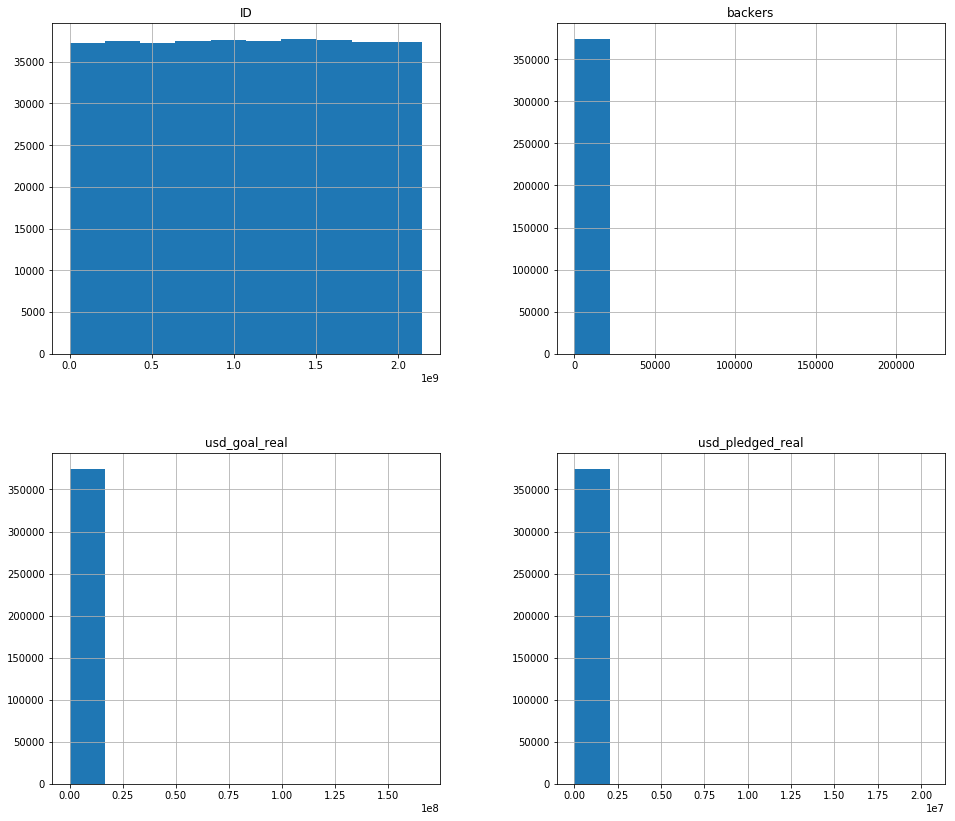

In [16]:
df.hist(figsize=(16,14)) #let's get a better idea of what we're working with here.

My columns look like columns...meaning that they do not have normal distributions. I also see that backers, usd_pledged and usd_goal, look somewhat zero-heavy.

In [17]:
(df.backers == 0).sum() #let's see how many projects have 0 backers

51811

There are about 50,000 projects with 0 backers, which accounts for roughly 15% of the data. That's a lot of data, and it could provide interesting insight as to why some kickstarters are not successful at all, so I am going to leave it in. 

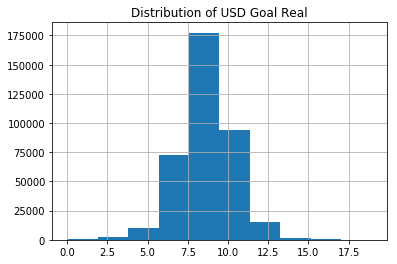

In [18]:
np.log(df.usd_goal_real + 1).hist() #hist of log transformed usd goal real
plt.title("Distribution of USD Goal Real")
plt.show()

The shape of USD goal looks a lot more normal when standardized. I will remember to transform my numerical variables prior to classification. I am not going to standardize my data before EDA because I want to look at the actual numbers and figures so I can get a better feel for the data.

In [19]:
df.backers.describe() #getting descriptive statistics

count    374860.000000
mean        106.688366
std         911.710124
min           0.000000
25%           2.000000
50%          12.000000
75%          57.000000
max      219382.000000
Name: backers, dtype: float64

In [20]:
df.backers.nlargest(10) #looking at the ten largest values in our backers' column.

187652    219382
75900     154926
292244    105857
148585     91585
182657     87142
23404      85581
157270     78471
239175     74405
272924     73986
38291      73206
Name: backers, dtype: int64

In [21]:
df.loc[187652] #let's look at the row with the crazy number of backers

ID                         1955357092
name                Exploding Kittens
category               Tabletop Games
main_category                   Games
currency                          USD
deadline                   2015-02-20
launched                   2015-01-20
state                      successful
backers                        219382
country                            US
usd_pledged_real          8.78257e+06
usd_goal_real                   10000
Name: 187652, dtype: object

Obviously, the most successful kickstarters are outliers. However, they are not outliers because of misentered data, they were just unusually successful because they probably went viral. When I settled on analyzing this dataset I decided to read up about Kickstarter up on Wikipedia and I actually remember reading about "Exploding Kittens" (who could forget a name like that) because it was listed as one of their top ten most successful campaigns in the history of Kickstarter. I am going to leave the outliers be for now and continue with EDA so I have a better idea of what I am working with.

<a id='eda'></a>

## Exploratory Data Analysis

I'm going to start looking at trends and relationships in my data to help me figure out what types of questions to ask as well as how I should proceed with certain data cleaning procedures.

My first step will be to examine my categorical data, specifically, the data literally pertaining to categories of Kickstarter campaigns.

<a id='main_cat_eda'></a>

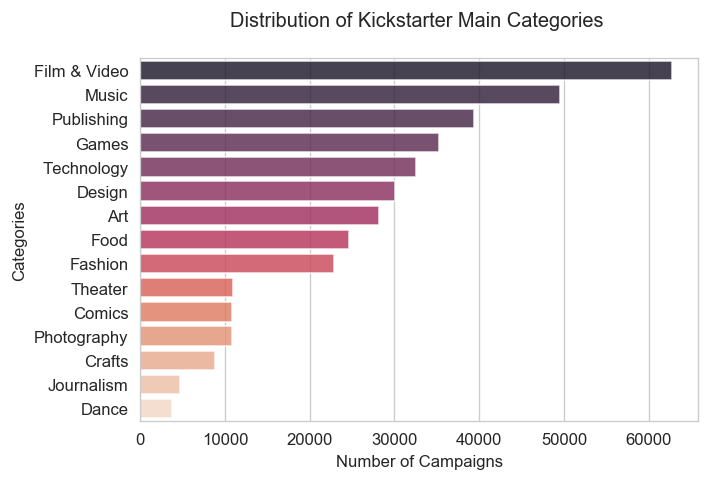

In [22]:
sns.set_style('whitegrid') #setting style
maincat = df.main_category.value_counts() #referencing my main category data by count per category

fig = plt.figure(dpi=120) #stylistic choices, figure size
ax = fig.add_subplot(111)
ax = sns.barplot(y=maincat.index, x=maincat.values, palette="rocket", alpha=0.8) #type of graph is barplot, setting x and y vals

plt.title('Distribution of Kickstarter Main Categories \n') #title
ax.set(xlabel='Number of Campaigns', ylabel='Categories') #labels
plt.show()

<a id='sub_cat_eda'></a>

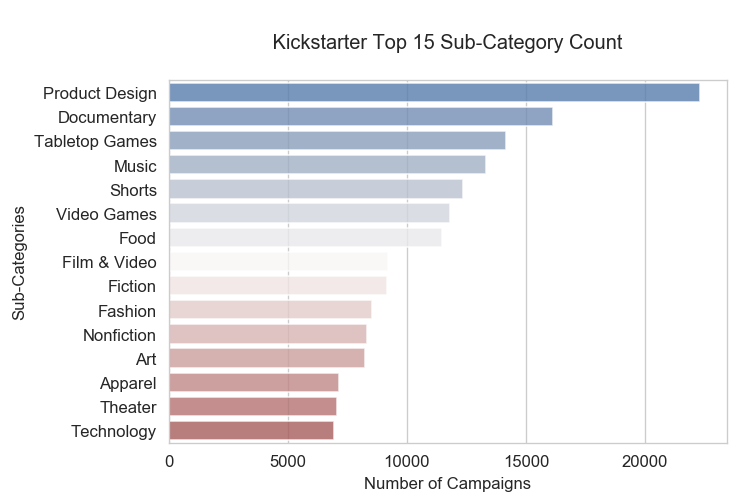

In [23]:
subcat = df.category.value_counts().head(15) #referencing subcategory data by value count
fig = plt.figure(dpi=120) #figure size 
ax = fig.add_subplot(111) 
ax = sns.barplot(y=subcat.index, x=subcat.values, palette="vlag", alpha=0.8) #setting x and y values and choosing type of plot

plt.title('\n Kickstarter Top 15 Sub-Category Count \n') #title
ax.set(xlabel='Number of Campaigns', ylabel='Sub-Categories') #labeling both axis
plt.show()

In [24]:
len(df.category.unique()) #how many subcats are there anyway?

159

There were only 15 main categories, but there are 159 total sub categories, so I decided to just take the top 15. In the main category graph it looks like film & video obviously dominate, but music still has a large edge on the other main categories. Neither the distribution of data between main categories nor the distribution of sub-categories are very evenly spread. I also notice a decent amount of overlap between main category and sub category, with music, food, film & video, among others appearing in both lists. 

<a id='pie'></a>

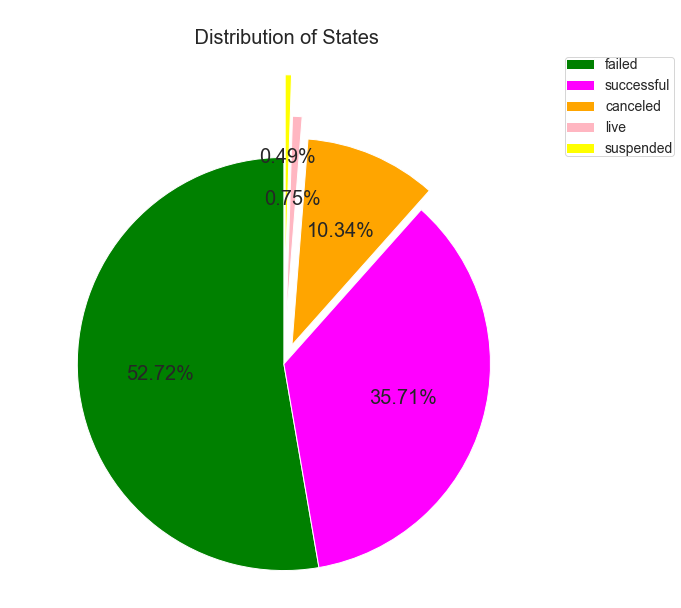

In [25]:
state = df.state.value_counts() #choosing information to display in graph

# Pie chart
labels = state.index #setting labels
sizes = state.values #setting values
colors = ['Green','Magenta','Orange','LightPink','Yellow', 'SkyBlue'] #stylistic choices
explode = [0,0,.1,.2, .4]

fig1, ax1 = plt.subplots(figsize = (8, 8)) #creating pie chart, setting size

patches, texts, autotext = ax1.pie(sizes, colors = colors, startangle=90, autopct='%0.2f%%', explode = explode,
 textprops={'fontsize': 20}) #creating pie chart

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.legend(labels,loc= 2,borderpad=0.05, fontsize = 14, bbox_to_anchor=(1,1))  #creating legend
plt.title('\n Distribution of States', fontsize = 20) #title

plt.show()

It's clear that most kickstarters fail. It looks like the three most common states, Failed, Successful, and Canceled, can account for most of the data, so we will continue concentrating mostly on them.

<a id='currency'></a>

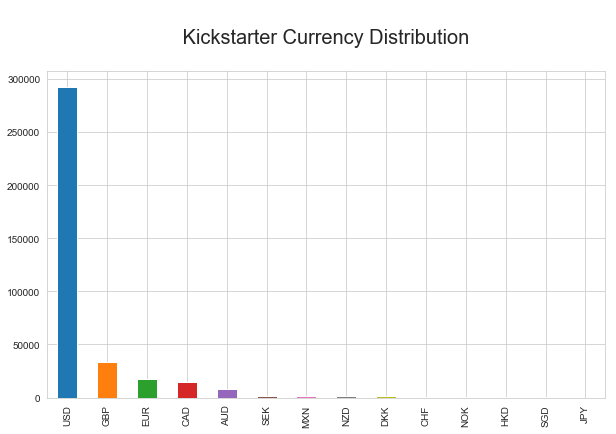

In [26]:
df['currency'].value_counts().plot.bar(figsize=(10,6)) #creating a barplot of currency distribution
plt.title('\n Kickstarter Currency Distribution \n', fontsize = 20) #title
plt.show()

<a id='country'></a>

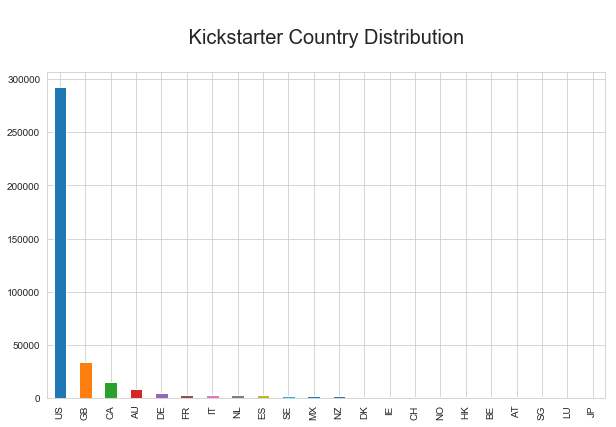

In [27]:
df.country.value_counts().plot.bar(figsize=(10,6)) #creating a barplot on country distribution
plt.title('\n Kickstarter Country Distribution \n', fontsize = 20) #title
plt.show()

The US definitely has the most Kickstarter campaigns, so it makes sense that the USD also dominates all other currencies in terms of Kickstarters. Since Kickstarter was started in the US, this does not come as a surprise. Before I run my classifiers, I will likely split both the country column and the currency column into 'US' and 'Not US' and 'USD' and 'Not USD', respectively.

<a id='feature_extraction_eda'></a>

### Feature Extraction for EDA

I'm going to create new columns and variables from our existing data to extract more information from our data. I am interested in both of the datetime columns and as well as both of the category columns. I will probably create more features later on, but for now I will start with this.

In [28]:
df['span_of_project'] = (df['deadline'] - df['launched']).dt.days #I also want to make a column based on the length of the project

In [29]:
df['launch_year']=pd.to_datetime(df['launched'], format="%Y/%m/%d").dt.year #creating column based on launch year
df['launch_month']=pd.to_datetime(df['launched'], format="%Y/%m/%d").dt.month #creating column based on launch month
df['launch_day']=pd.to_datetime(df['launched'], format="%Y/%m/%d").dt.dayofweek #creating column based on launch day of week

In [30]:
df.launch_year.describe() #let's also check the distribution 

count    374860.000000
mean       2014.240602
std           1.940696
min        1970.000000
25%        2013.000000
50%        2014.000000
75%        2016.000000
max        2018.000000
Name: launch_year, dtype: float64

In [31]:
df.launch_year.nsmallest(10) #hmmm let's check out the minimum values here

2842      1970
48147     1970
75397     1970
94579     1970
247913    1970
273779    1970
319002    1970
267       2009
357       2009
643       2009
Name: launch_year, dtype: int64

In [32]:
df = df[df.launch_year >= 1971] #I don't think Kickstarter existed in 1970 so lets get rid of those

I also want to be able to easily reference whether a project was successful or not.

In [33]:
fail = df.loc[df.state=='failed'] #unsuccessful campaigns
success = df.loc[df.state=='successful'] #successful campaigns
canceled = df.loc[df.state=='canceled'] #canceled campaigns

I am now going to create a column reflecting the average amount of money a backer donated based on the amount pledged to the campaign.

In [34]:
df['pledge_per_backer_log'] = np.log((df['usd_pledged_real']+1)/(df['backers']+1)) #divide amount pledged by no. of backers & log transform

<a id='eda_success'></a>

### EDA based on Success of Kickstarters

In [35]:
print('Average Number of Backers of Failed Kickstarters:\n',fail['backers'].mean()) #calculating averages of number of backers
print('Average Number of Backers of Successful Kickstarters:\n',success['backers'].mean())
print('Average Number of Backers of Canceled Kickstarters:\n',canceled['backers'].mean())

Average Number of Backers of Failed Kickstarters:
 16.431236115398434
Average Number of Backers of Successful Kickstarters:
 264.12839650058646
Average Number of Backers of Canceled Kickstarters:
 26.006167582772058


The number of backers X success does not surprise me, as the more backers there are, the more successful a campaign will obviously be. It's interesting that the number of backers for successful campaigns is so much higher than unsuccessful campaigns (about 16 times higher), but that number is probably inflated because of the super successful campaigns that go viral.

In [36]:
#calculating averages for duration
print('Average Duration (in days) of Failed Kickstarters:\n',fail['span_of_project'].mean())
print('Average Duration (in days) of Successful Kickstarters:\n',success['span_of_project'].mean())
print('Average Duration (in days) of Canceled Kickstarters:\n',canceled['span_of_project'].mean())

Average Duration (in days) of Failed Kickstarters:
 35.174585422876255
Average Duration (in days) of Successful Kickstarters:
 32.15671903833367
Average Duration (in days) of Canceled Kickstarters:
 35.99034863616423


It looks like most kickstarters stay up for about 5 weeks. This means that after a month, you can pretty much tell whether or not your kickstarter will take off. I am intrigued by the fact that there is not a huge difference in duration between successful and unsuccessful campaigns.

<a id='goal_by_cat'></a>

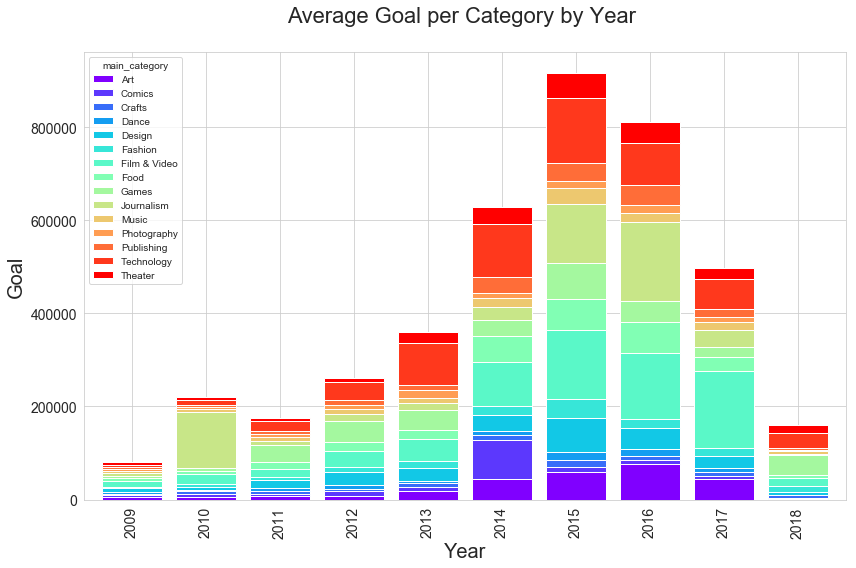

In [37]:
ax1 = plt.subplot(111) #creating plot
df.groupby(["launch_year", "main_category"])["usd_goal_real"].mean().unstack().plot(kind='bar', 
                                                        figsize=(12,8), stacked=True, width=0.8, colormap='rainbow', ax=ax1)

plt.title('Average Goal per Category by Year \n', fontsize=22) #title and labels
plt.xlabel('Year', fontsize=20)
plt.ylabel('Goal', fontsize=20)
plt.xticks(fontsize=14) #x and y ticks
plt.yticks(fontsize=14)

plt.tight_layout() #keeps labels from overlapping
plt.show() #show subplots

It looks like most categories follow the overall trend of increasing their goal as Kickstarter gained more popularity over the years (and then decreasing average goal amount as kickstarter started losing traction starting in 2016). A few parts of the graph that jump out to me are journalism, which saw a disproportionate amount of growth between 2009 and 2010 and again a few years later between 2014 and 2015. Another disproportionate growth amount came with the comic category in 2014. I wonder if a huge project in those categories recieved a lot of backing the year prior to the large jump in goal level, thus inspiring people to reach for the stars with their goals. It looks like technology pretty consistently had the most ambitious goals each year. I was surprised at how low the average music goal was each year, given how popular the category is.

<a id='launch_graph'></a>

In [38]:
import plotly #import plotly for visualization
from plotly import tools
from plotly.offline import init_notebook_mode, iplot #display in notebook
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings('ignore') #ignore warnings

#first plot success X year 
trace1 = go.Bar(
            x=success.launch_year.value_counts().index, #referencing our data
            y=success.launch_year.value_counts().values,
            marker = dict(color = 'peachpuff'),
            name = 'Success/Year', 
        )
#second plot success X month
trace2 = go.Bar(
            x=success.launch_month.value_counts().index, #referencing our data
            y=success.launch_month.value_counts().values,
            marker = dict(color = 'orange'),
            name = 'Success/Month'
        )
#second plot success X day
trace3 = go.Bar(
            x=success.launch_day.value_counts().index, #referencing our data
            y=success.launch_day.value_counts().values,
            marker = dict(color = 'orangered'),
            name = 'Success/Day'
        )
#second plot fail X year
trace4 = go.Bar(
            x=fail.launch_year.value_counts().index, #referencing our data
            y=fail.launch_year.value_counts().values,
            marker = dict(color = 'skyblue'),
            name = 'Failed/Year', 
        )
#second plot fail X month
trace5 = go.Bar(
            x=fail.launch_month.value_counts().index, #referencing our data
            y=fail.launch_month.value_counts().values,
            marker = dict(color = 'mediumblue'),
            name = 'Failed/Month', 
        )
#second plot fail X day
trace6 = go.Bar(
            x=fail.launch_day.value_counts().index, #referencing our data
            y=fail.launch_day.value_counts().values,
            marker = dict(color = 'darkblue'),
            name = 'Failed/Day'
        )
fig = tools.make_subplots(rows=2, cols=3, subplot_titles=('Successful X Launch Year', 'Successful X Launch Month', 'Successful X Launch Day',
                                                          'Failed X Launch Year', 'Failed X Launch Month', 'Failed X Launch Day'))
fig.append_trace(trace1, 1, 1) #adding each to graphic
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 1, 3)
fig.append_trace(trace4, 2, 1)
fig.append_trace(trace5, 2, 2)
fig.append_trace(trace6, 2, 3)
fig['layout'].update(height=400, width=1100, title='Time of Launch X Success of Kickstarters') #dimensions and title
iplot(fig)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]  [ (1,3) x3,y3 ]
[ (2,1) x4,y4 ]  [ (2,2) x5,y5 ]  [ (2,3) x6,y6 ]



*Note that days of week starts with Sunday as '0'*

The amount of failed campaigns greatly outnumbers the amount of successful campaigns, so the numbers in the failed campaign graphs are all much higher higher than the numbers in the successful campaign graphs. However, it looks like the trends for day, month and year are pretty similar between failed and successful campaigns. This could reflect the trend of when people tend to make posts in general. It looks like people are actually most inspired to start chasing their dreams on a Monday. As the week goes on, it appears that people are less likely to launch successful or failed campaigns. As for month, it seems that failed campaigns are slightly more likely to be launched in July than any other month. When looking at year, it looks like successful and failed campaigns were actually pretty equal in 2009 and 2010, and then once it started picking up on popularity, failed campaigns of course started to outnumber successful ones.

<a id='cats_success'></a>

In [39]:
 #first plot success X sub category  
trace1 = go.Bar(
            x=success.category.value_counts().index, #referencing our data
            y=success.category.value_counts().values,
            name = 'Successful', 
        )

#second plot fail X sub category
trace2 = go.Bar(
            x=fail.category.value_counts().index, #referencing our data
            y=fail.category.value_counts().values,
            name = 'Failed', 
        )

fig = tools.make_subplots(rows=1, cols=2, subplot_titles=('Successful X Sub Category', 'Failed X Sub Category'))
fig.append_trace(trace1, 1, 1) #adding both plots to graphic
fig.append_trace(trace2, 1, 2)

fig['layout'].update(height=400, width=1100, title='Top Categories for Successful and Failed Kickstarters') #dimensions and title

iplot(fig)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



Product Design is pretty big in both succcessful and failed campaigns, as is Non-fiction, which makes sense as both were very popular sub-categories overall. Horror and Drinks also made the cut to be included on both graphs, landing roughly in the middle of each graph. Other than those, it doesn't seem like there's a whole lot of overlap between the plots, which means that sub-category could be a good predictor on whether or not your kickstarter will be successful.  

<a id='backer_cat_year'></a>

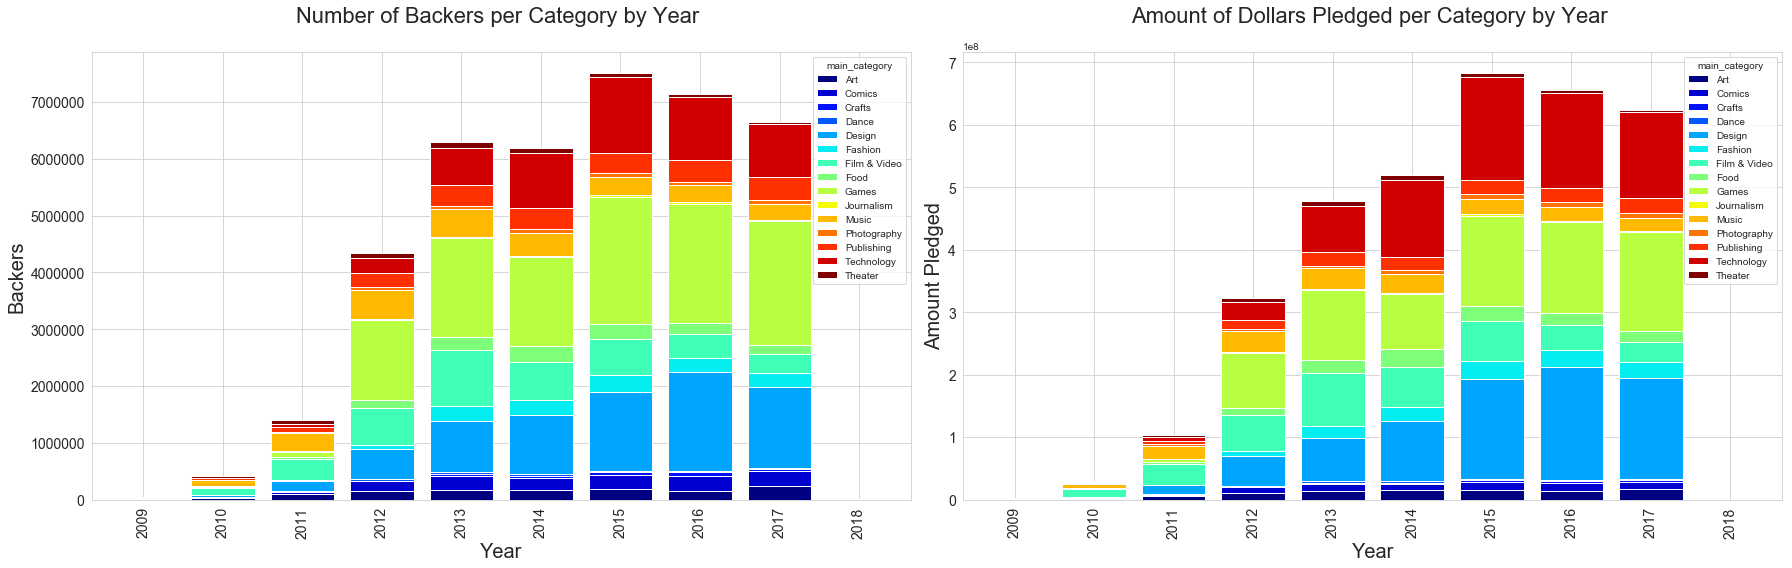

In [40]:
ax1 = plt.subplot(121) #creating first subplot
df.groupby(["launch_year", "main_category"])["backers"].sum().unstack().plot(kind='bar', 
                                                        figsize=(25,8), stacked=True, width=0.8, colormap='jet', ax=ax1)

plt.title('Number of Backers per Category by Year \n', fontsize=22) #title and labels
plt.xlabel('Year', fontsize=20)
plt.ylabel('Backers', fontsize=20)
plt.xticks(fontsize=14) #x and y ticks
plt.yticks(fontsize=14)

ax2 = plt.subplot(122) #creating second subplot 
df.groupby(["launch_year", "main_category"])["usd_pledged_real"].sum().unstack().plot(kind='bar', 
                                                        figsize=(25,8), stacked=True, width=0.8, colormap='jet', ax=ax2)

plt.title('Amount of Dollars Pledged per Category by Year \n', fontsize=22) #title and labels
plt.xlabel('Year', fontsize=20)
plt.ylabel('Amount Pledged', fontsize=20)
plt.xticks(fontsize=14) #x and y ticks
plt.yticks(fontsize=14)

plt.tight_layout() #keeps labels from overlapping
plt.show() #show subplots


Number of backers and amount pledged seemed to follow the same pattern of increasing/decreasing throughout the years, with the exception of the jump between 2013 and 2014, when number of backers decreases but amount pledged increases, which is interesting. It looks like the distribution of backers X categories stays pretty consistent throughout the graph (i.e., Games dominates over the other backers every year after 2011, while Art and Theater are pretty much last place every year). The distribution changes a little bit in the Pledged graph, however, with Technology starting off less popular than Games, but soon edging it out come 2014. 

It's notable that some categories, such as Games, have a higher average of backers than other categories but fail to have as many dollars pledged, while the opposite is true for Technology, which has a lower average amount of backers, but the average donation for a tech campaign is typically larger than for other areas. This could be because people perhaps have more confidence in the tech industry than they do in the Gaming industry, since the tech industry is ever-booming and is seen as leading the future. Let's take a closer look at this with our pledge_per_backer variable.


<a id='ppb'></a>

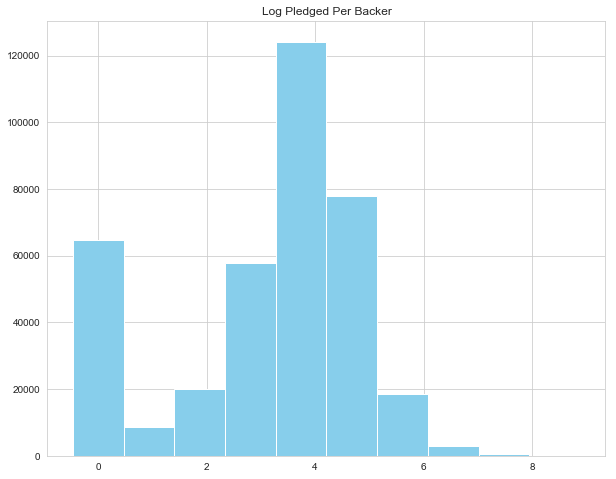

In [41]:
df['pledge_per_backer_log'].hist(figsize =(10,8), color = 'SkyBlue')
plt.title("Log Pledged Per Backer")
plt.show()

The histogram for log pledged per backer is pretty normal looking, with the exception of the large amount of data on the far right, which is due to the data being so zero-heavy.

<a id='ppb_cat'></a>

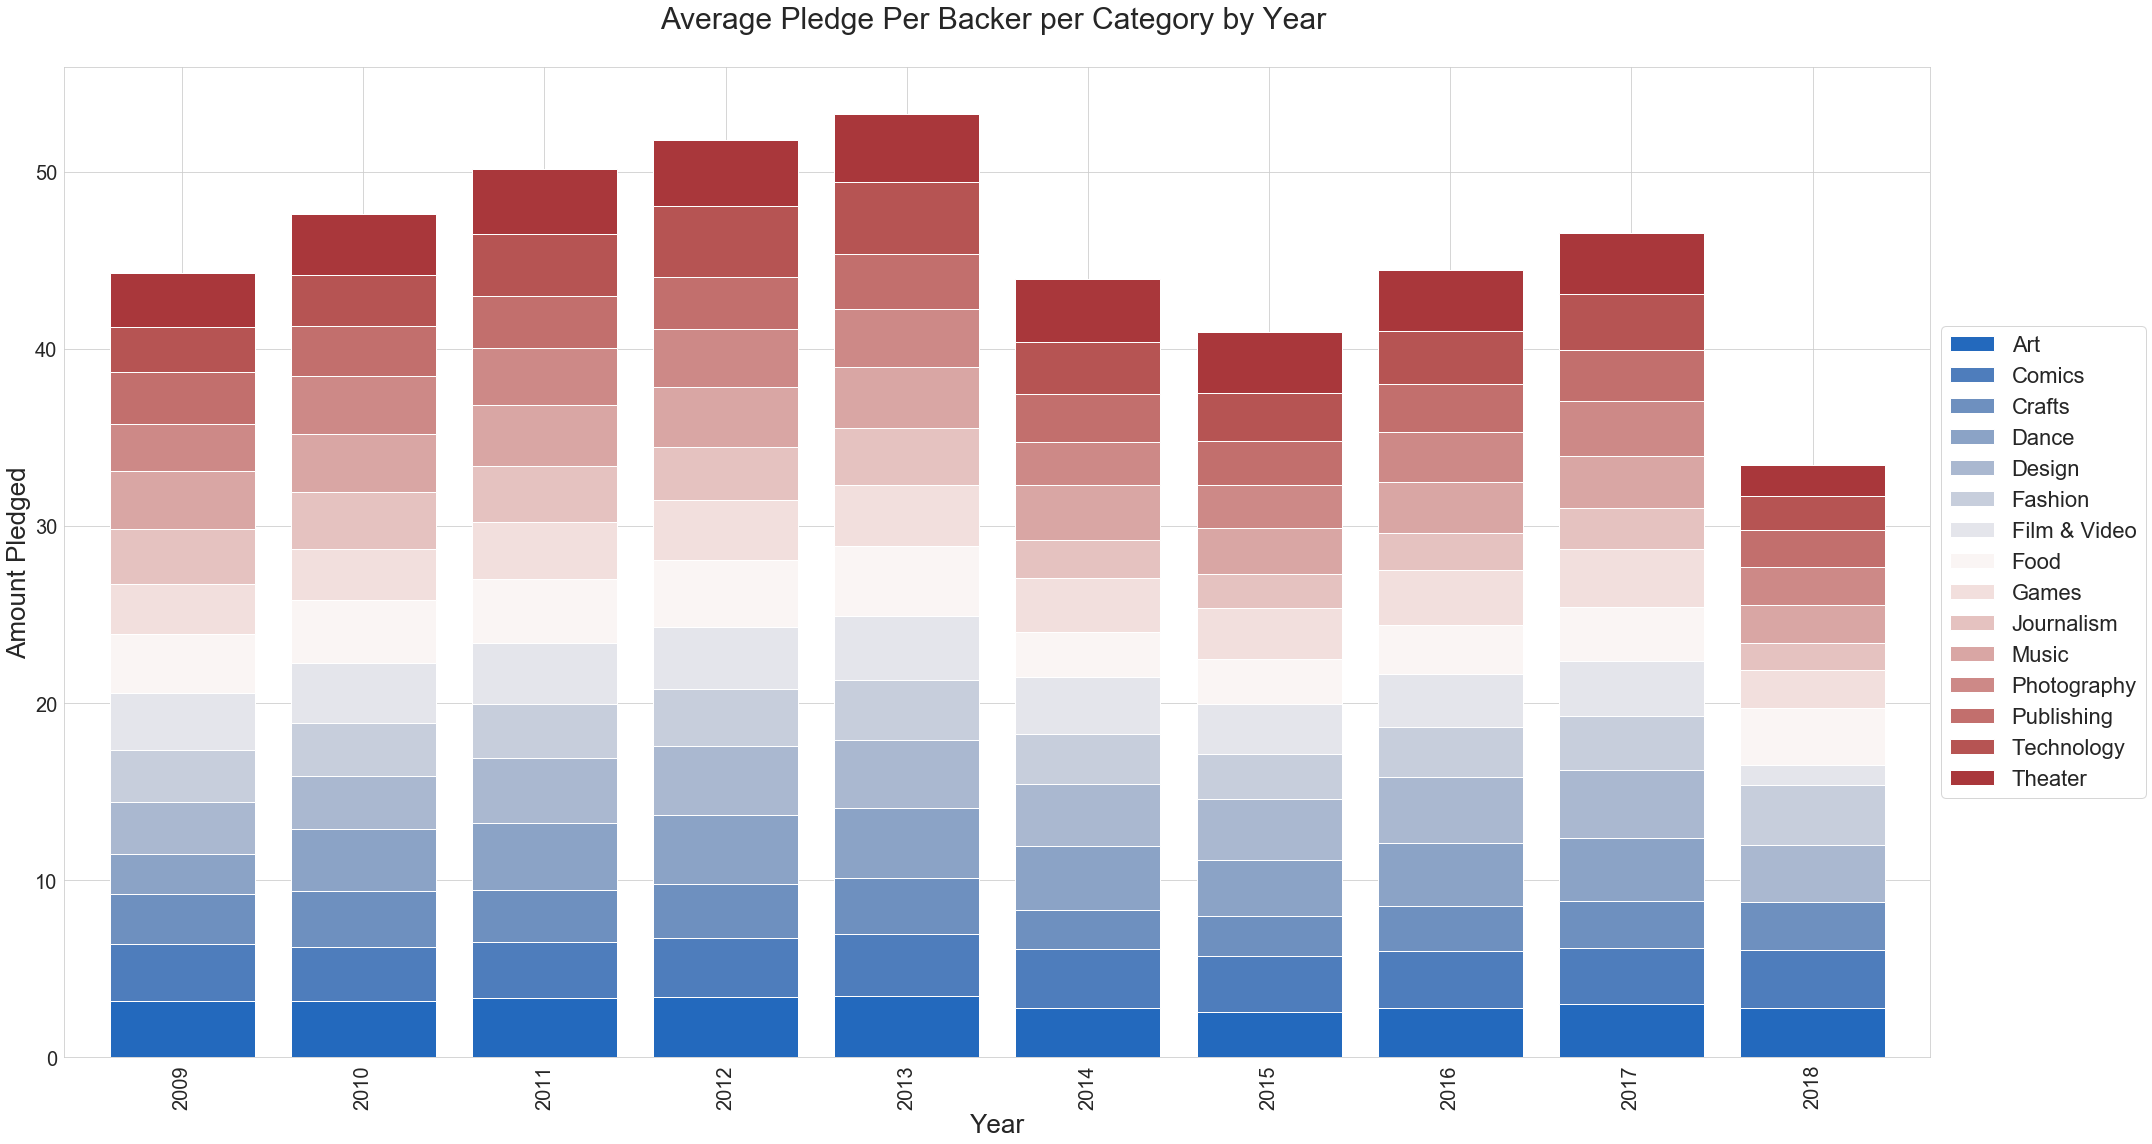

In [42]:
ax1 = plt.subplot(111) #creating plot of pledge per backer
df.groupby(["launch_year", "main_category"])["pledge_per_backer_log"].mean().unstack().plot(kind='bar', 
                                                        figsize=(30,16), stacked=True, width=0.8, colormap='vlag', ax=ax1)

plt.title('Average Pledge Per Backer per Category by Year \n', fontsize=30) #title and labels
plt.xlabel('Year', fontsize=26)
plt.ylabel('Amount Pledged', fontsize=26)
plt.xticks(fontsize=20) #x and y ticks
plt.yticks(fontsize=20)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=22) 

plt.tight_layout() #keeps labels from overlapping
plt.show() #show subplots

The average investment that a backer made to a campaign reveals a few notable trends. One is that in 2018, when almost every other category saw a decrease in PPB, Food actually saw a pretty large increase. Otherwise, the categories' PPG all seem to grow and shrink mostly on the same scale (although this is partially due to the fact that this data is technically normalized, since we are using the log of PPB). On a larger scale, as opposed to the graphs above which both show a dip in numbers between 2016 and 2017, PPB actually increased between 2016 and 2017. Additionally, while the plots above have their highest numbers in 2014 and 2015, PPB's peak year is 2013.

<a id='wordclouds'></a>

# WordClouds

WordClouds provide an informative visual to show the frequency of a word in mass of text. I am going to generate two WordClouds, one from the titles of successful projects and the other from the titles of failed projects.  I think that the title of a project could be a useful predictor, because the title is the first (and sometimes only) chance to grab a reader's attention if they are just scrolling on their Facebook feed.

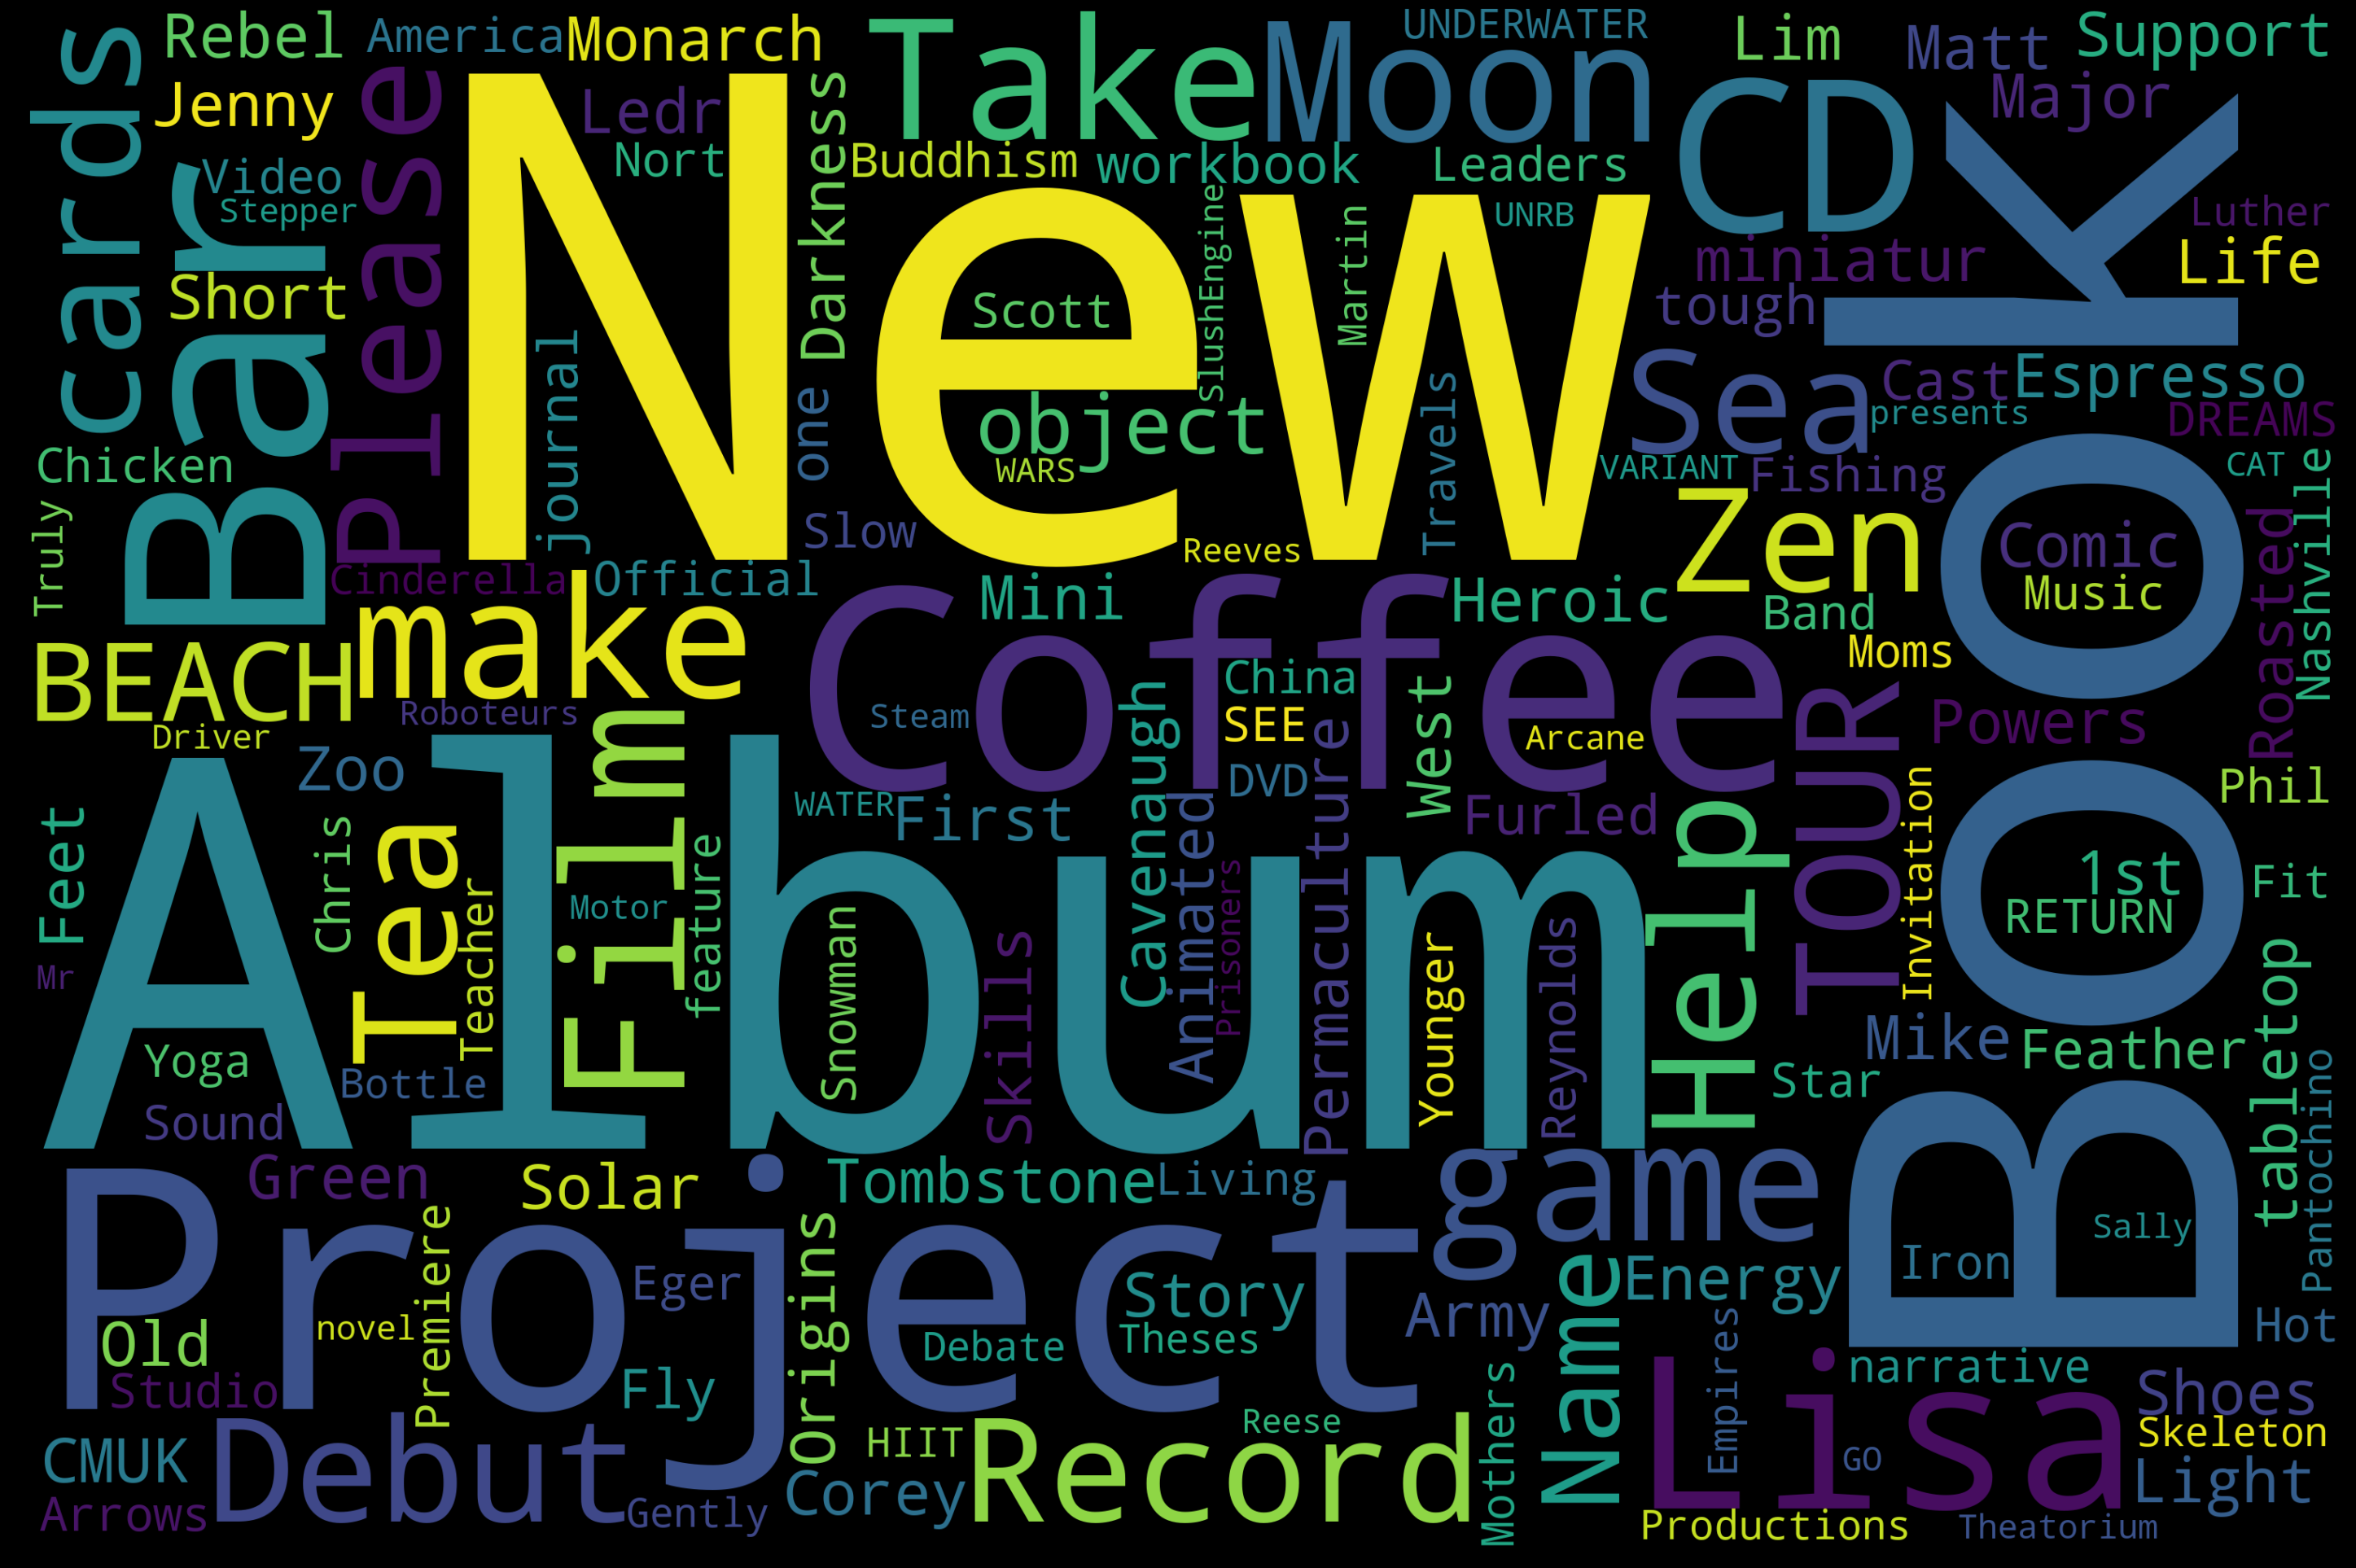

In [43]:
text = success.name #generate wordcloud from titles of successful projects

wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    max_words = 150,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text)) #create figure, stopwords are words that words that will not be included
                                                #wordcloud already has a built in list of words to ignore
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k') #figsize and colors
plt.imshow(wordcloud, interpolation = 'bilinear') #this creates a streamlined layout
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Looks like the word "New" is the most frequently used word. A lot of the words that follow are words that are associated with our more popular categories of projects, such as the words "Album", "Book" and "Film". Some of the more interesting words that pop up are "Moon", "Rebel" and "Darkness". There seem to be a decent amount of names in here to me as well, like "Jenny", "Matt", and "Corey". I am also noticing a lot of words associated with the environment, such as "Green", "Solar", and "Energy".

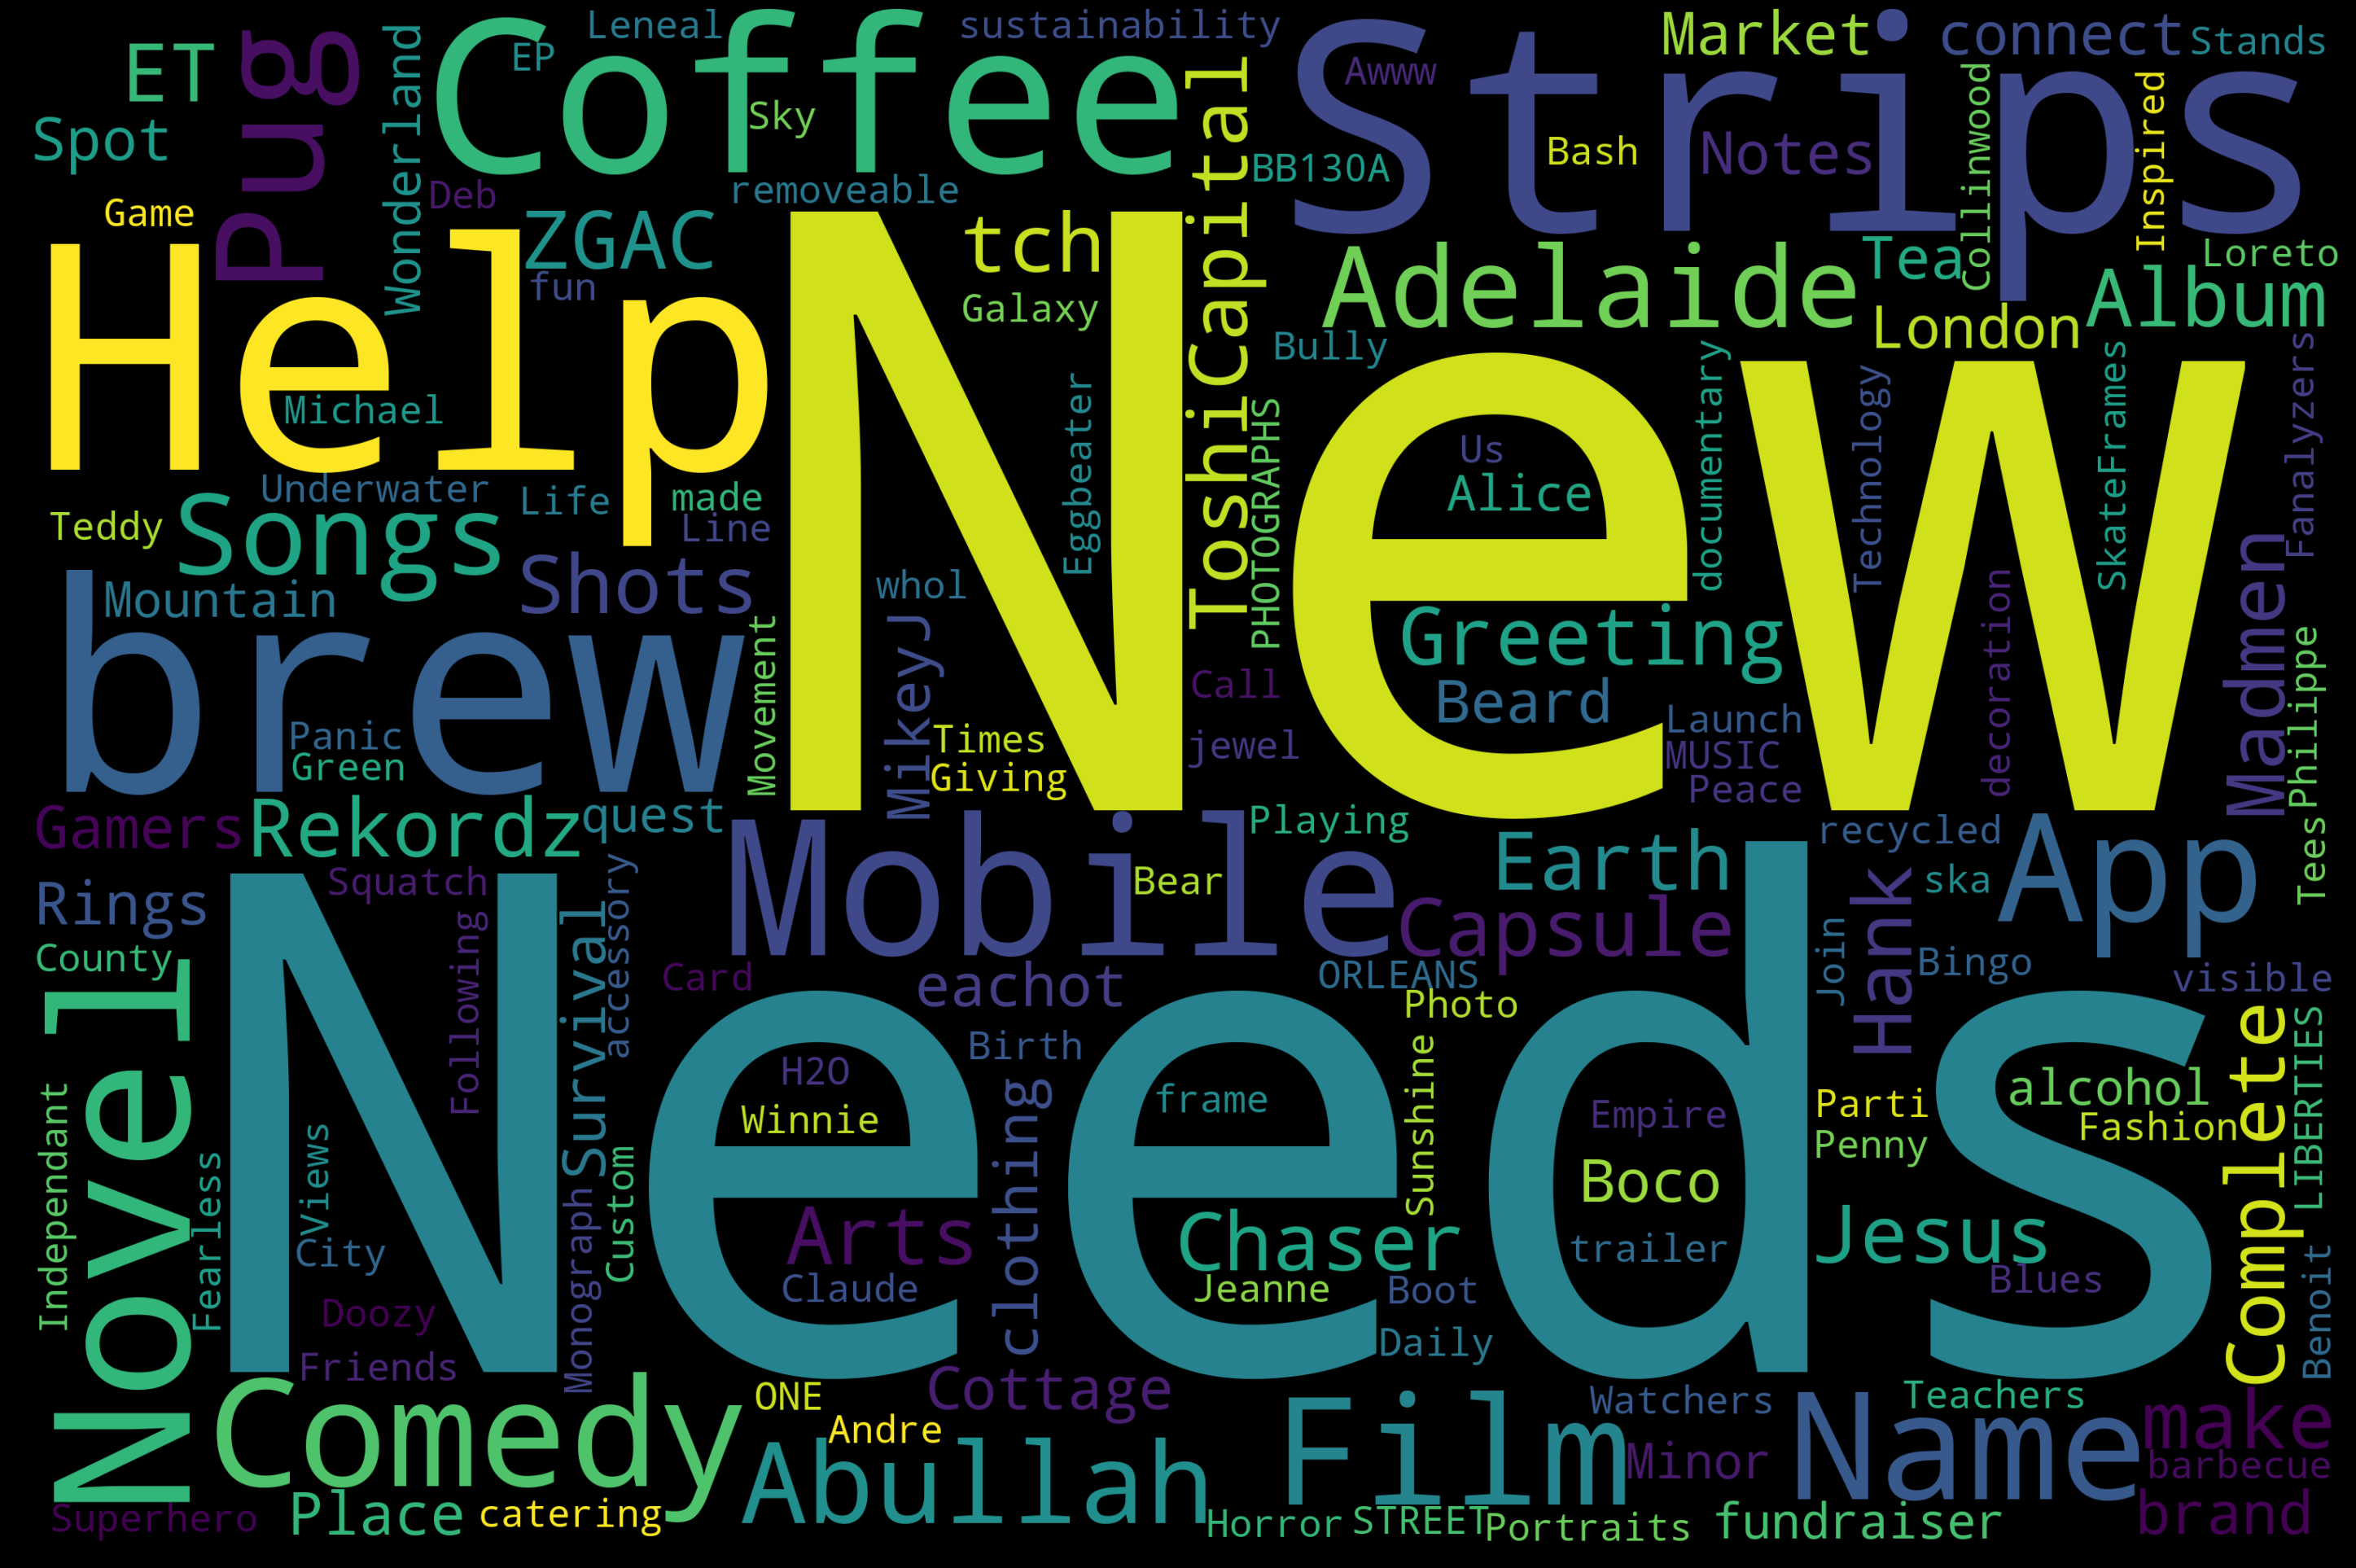

In [44]:
text = fail.name #generate wordcloud from titles of failed projects

wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    max_words = 150,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text)) #create figure, stopwords are words that words that will not be included
                                                #wordcloud already has a built in list of words to ignore
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k') #figsize and colors
plt.imshow(wordcloud, interpolation = 'bilinear') #this creates a streamlined layout
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

There is definitely some overlap between the wordcloud of successful projects and failed projects, most notably the word "New", which is a popular word to use in general. I see more specific locations listed in the failed cloud, such as "Adelaide", "London" and "Orleans" (probably referring to New Orleans). While there are places listed in the success cloud as well, they seem to be a little more general, such as "America" and "China". 

I also see some references to religion more in the failed cloud, such as "Abullah" and "Jesus". It sticks out to me that the words "Needs" and "Help" are so big in the failed cloud, which maybe suggests that people do not like kickstarters representing "causes" as much as they like kickstarters that are more geared towards creation/innovation.

There are some environmental buzzwords in the failed cloud as well, such as "Green" (again), "Earth", and "Recycled". It seems that the successful campaigns included more specific words for potentially helping the planet (such as "steam", "solar" and "energy") while the failed campaigns are a little more general.

<a id='data_prep'></a>

## Data Preparation

It's time to transform my variables and finish up with some data cleaning. Once I have finished with the basics, I will add a few more features and then start classification.

<a id='ft_engineer2'></a>

### Feature Engineering (part 2)

We already began with feature extraction/engineering in the midst of our exploratory data analysis, however, there are still more features that we can create, so I will finish that now. I'll start by creating a couple of features that will aid in organizing the titles of our kickstarter projects. 

In [45]:
df_final=df.copy() #creating a copy of dataframe 

In [46]:
#length of title
df_final['name_length'] = df_final.name.str.len()

# titles with exclaimation points
df_final['name_exclaim'] = (df_final.name.str[-1] == '!').astype(int)

# titles with question marks
df_final['name_question'] = (df_final.name.str[-1] == '?').astype(int)

# number of words per title
df_final['name_wordcount'] = df_final.name.apply(lambda x: len(str(x).split(' ')))

# uppercase titles
df_final['name_upper'] = df_final.name.str.isupper().astype(float)

# titles where first letter of each word capitalized
df_final['name_title'] = df_final.name.str.istitle().astype(float)

We already had our "success" and "fail" variables, but I'm actually going to add a column to the dataframe to reflect whether or not a campaign was successful.

In [47]:
df_final['successful'] = np.where(df_final.state == 'successful', 1, 0) #denotes whether campaign was sucessful or not

Since we have way more data on US kickstarters than any other country, I am going to create a feature divides the set into US kickstarters and kickstarters from other countries to help balance our country data out.

In [48]:
df_final['US'] = np.where(df_final.country=='US', 1, 0) #creating feature to indictate whether project was made in US or not

<a id='textstat'></a>

### TextStat Variables

While looking for methods to analyze my text data, I found a package called TextStat, which includes several different measures of "readibility". Most of the scales that they use analyze the string and then assign a score that correlates with a grade level. For instance, a sentence with a Flesch Kincaid Grade of 6.1 means that a sixth grader could read it. To read more about TextStat and how each scale calculates scores and what those scores mean, click [here](https://pypi.org/project/textstat/).

In [49]:
from textstat.textstat import textstat #importing textstat 

In [50]:
df_final['flesch_reading_ease'] = df_final['name'].apply(lambda x: textstat.flesch_reading_ease(x)) #apply first scale

In [51]:
df_final['flesch_kincaid_grade'] = df_final['name'].apply(lambda x: textstat.flesch_kincaid_grade(x)) #apply scales 2-4
df_final['coleman_liau_index'] = df_final['name'].apply(lambda x:textstat.coleman_liau_index(x))
df_final['smog_index'] = df_final['name'].apply(lambda x:textstat.smog_index(x))

In [52]:
df_final['difficult_words'] = df_final['name'].apply(lambda x: textstat.difficult_words(x)) #apply scales 5-7
df_final['linsear_write_formula'] = df_final['name'].apply(lambda x: textstat.linsear_write_formula(x))
df_final['automated_readability_index'] = df_final['name'].apply(lambda x: textstat.automated_readability_index(x))

In [53]:
df_final['dale_chall_readability_score'] = df_final['name'].apply(lambda x: textstat.dale_chall_readability_score(x))
df_final['gunning_fog'] = df_final['name'].apply(lambda x: textstat.gunning_fog(x)) #apply scales 8-10
df_final['text_standard'] = df_final['name'].apply(lambda x: textstat.text_standard(x))

### Dropping Columns

<a id='drop'></a>

We need to drop all of the variables that are dependent on our final state, such as "pledged" and "backers". I'm also going to remove columns such as "name" since we've already extracted a number of variables from it and it would not be useful to us to one-hot encode it.

In [54]:
#list of columns to drop
to_drop= ['ID','name','launched','deadline','backers','usd_pledged_real','state', 'pledge_per_backer_log', 'country']
#dropping list of columns from final_df
df_final.drop(to_drop, axis=1, inplace=True)

Before I one-hot code my categorical variables, I want to make sure that they are all easy to work with. I am going to remove any special characters that could cause errors later in my model.

### Column Names

<a id='names'></a>

In [55]:
#creating functions to make the names of main categories and sub categories easy to work with so I do not run into errors
def no_whitespace(val):#removes whitespace
        if isinstance(val, str):
            return(val.strip())
        else:
            return(val)

def no_amp(val): #removes and replaces ampersand
    if isinstance(val, str):
        return(val.replace('&', 'and'))
    else:
        return(val)

def no_hyphen(val): #removes and replaces hyphen
    if isinstance(val, str):
        return(val.replace('-', '_'))
    else:
        return(val)
    
def no_space(val): #replace space
        if isinstance(val, str):
            return(val.replace(' ', '_'))
        else:
            return(val)  

In [56]:
#I'm going to use all of my new functions on the category as well as main_category columns

#first take care of sub category
df_final['category'] = df_final['category'].apply(no_whitespace) #remove excess white space
df_final['category'] = df_final['category'].apply(no_amp) #remove & sign
df_final['category'] = df_final['category'].apply(no_hyphen) #remove hyphen
df_final['category'] = df_final['category'].apply(no_space) #remove space

#next take care of main category
df_final['main_category'] = df_final['main_category'].apply(no_whitespace) #remove excess white space
df_final['main_category'] = df_final['main_category'].apply(no_amp) #remove & sign
df_final['main_category'] = df_final['main_category'].apply(no_hyphen) #remove hyphen
df_final['main_category'] = df_final['main_category'].apply(no_space) #remove space

### Multicollinearity

<a id='multi'></a>

I'm also going to check for multicollinearity before I continue using seaborn's built-in heatmap function. 

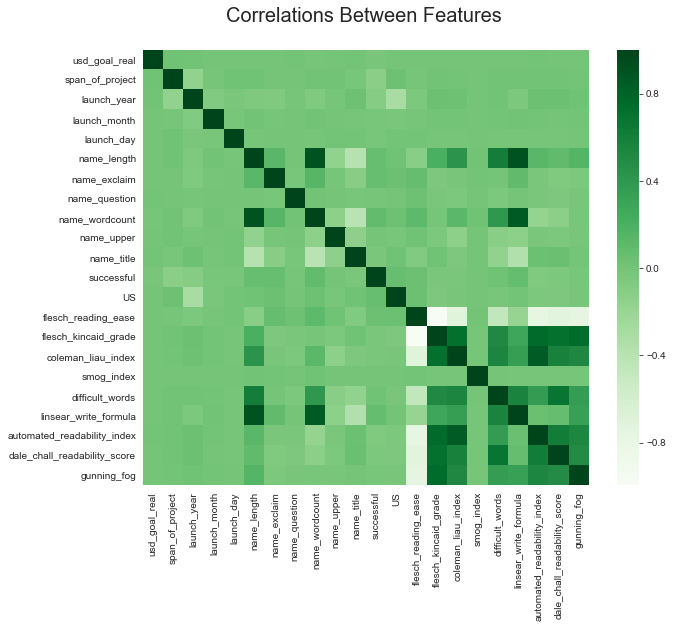

In [57]:
fig, ax = plt.subplots(figsize=(10,8)) 
sns.heatmap(df_final.corr(), cmap='Greens', ax=ax)

plt.title('Correlations Between Features \n', fontsize = 20)
plt.show()

It seems that some of our textstat variables could be redundant, especially with the presence of the name variables that I made by hand. The linsear write formula correlates highly with name_length and name_wordcount, so I think I will get rid of that. The flesch reading ease and the automated readability index also have high multicollinearity with multiple variables, so I will drop each of those columns as well.

In [58]:
df_final.drop('flesch_reading_ease', axis=1, inplace=True) #let's get rid of these variables so that we can reduce noise in the df
df_final.drop('linsear_write_formula', axis=1, inplace=True)
df_final.drop('automated_readability_index', axis=1, inplace=True)
#also getting rid of text_standard because many of the values did not make a lot of sense
df_final.drop('text_standard', axis=1, inplace=True)
df_final.drop('name_wordcount', axis=1, inplace=True)

### One Hot Encoding

<a id='hot'></a>

In [59]:
#create list of cat variables that need dummies
dummy_columns = ['category', 'main_category', 'currency', 'launch_year', 'launch_month', 'launch_day', 'name_exclaim', 'name_question',
                'name_title', 'name_upper', 'US']

#one hot encode time!
df_final = pd.get_dummies(df_final, columns = dummy_columns)

In [60]:
df_final.shape #let's verify that this worked

(374853, 237)

In [61]:
list(df_final) #a list of all of our columns 

['usd_goal_real',
 'span_of_project',
 'name_length',
 'successful',
 'flesch_kincaid_grade',
 'coleman_liau_index',
 'smog_index',
 'difficult_words',
 'dale_chall_readability_score',
 'gunning_fog',
 'category_3D_Printing',
 'category_Academic',
 'category_Accessories',
 'category_Action',
 'category_Animals',
 'category_Animation',
 'category_Anthologies',
 'category_Apparel',
 'category_Apps',
 'category_Architecture',
 'category_Art',
 'category_Art_Books',
 'category_Audio',
 'category_Bacon',
 'category_Blues',
 'category_Calendars',
 'category_Camera_Equipment',
 'category_Candles',
 'category_Ceramics',
 "category_Children's_Books",
 'category_Childrenswear',
 'category_Chiptune',
 'category_Civic_Design',
 'category_Classical_Music',
 'category_Comedy',
 'category_Comic_Books',
 'category_Comics',
 'category_Community_Gardens',
 'category_Conceptual_Art',
 'category_Cookbooks',
 'category_Country_and_Folk',
 'category_Couture',
 'category_Crafts',
 'category_Crochet',
 'categ

<a id='classification'></a>

## Classification

In [62]:
#time to load the modules that I didn't load at the start of my notebook
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score 

from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

<a id='split'></a>

### Test/Train Split

Our first step is to split our data into a test set and a train set, so that we can "teach" our model how to make accurate predictions based on our given data.

In [63]:
X = df_final.drop(['successful'], 1) #separate features and target variable
y = df_final.successful

In [64]:
scaler = StandardScaler() #transform everything in x
X_scaled = scaler.fit_transform(X)

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0) #THEN split

<a id='lr'></a>

### Logistic Regression

Logistic regression is similiar to linear regression but it is used when the output is binary instead of a number. The logistic function is applied to the regression to obtain the probability that a variable belongs to either class. It then classifies the variable based on which probability is higher.

In [66]:
%%time 
#using the time function to see how long it takes each classifier to run

# declare a logistic regression classifier
lr = LogisticRegression(penalty='l2', solver='liblinear') #liblinear supports l2 regularization

# Fit the model
fit = lr.fit(X_train, y_train)

pred_y = lr.predict(X_test) 

lrs = round(lr.score(X_test, y_test)*100,2) #format accuracy score
print('\nAccuracy Percentage:', lrs)

#y_score = logreg.fit(X_res, y_res).decision_function(X_res)
#y_pred = logreg.fit(X_res, y_res).predict(X_test)


Accuracy Percentage: 69.31
Wall time: 1min 9s


### Logistic Regression Evaluation

In [67]:
print('\nActual vs. Predicted \n') #confusion matrix
print(pd.crosstab(y_test, pred_y, rownames=['True'], colnames=['Predicted'], margins=True))

print('\n\n\n', classification_report(y_test, pred_y))


Actual vs. Predicted 

Predicted      0      1    All
True                          
0          41588   6822  48410
1          16183  10378  26561
All        57771  17200  74971



               precision    recall  f1-score   support

           0       0.72      0.86      0.78     48410
           1       0.60      0.39      0.47     26561

   micro avg       0.69      0.69      0.69     74971
   macro avg       0.66      0.62      0.63     74971
weighted avg       0.68      0.69      0.67     74971



<a id='cat'></a>

### Catboost

The name Catboost comes from Categorical Boosting. Catboost is a library that uses gradient boosting and is successful with a diverse range of data types. 

In [68]:
%%time 

from catboost import CatBoostClassifier #import library
catmodel = CatBoostClassifier(
    custom_loss=['Accuracy'], #metric to use in training
    random_seed=0, #consistent with other random seeds
    logging_level='Silent' #we already have the time function to show time elapsed
)
catmodel.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    plot=False
); #fit model

catscore = round(catmodel.score(X_test, y_test) * 100, 2) #round score 
print('\nAccuracy Percentage:', catscore)


Accuracy Percentage: 71.8
Wall time: 2min 1s


In [69]:
pred_y_cat = catmodel.predict(X_test)
print('\nActual vs. Predicted \n') #confusion matrix
print(pd.crosstab(y_test, pred_y_cat, rownames=['True'], colnames=['Predicted'], margins=True))

print('\n\n\n', classification_report(y_test, pred_y_cat))


Actual vs. Predicted 

Predicted    0.0    1.0    All
True                          
0          41338   7072  48410
1          14067  12494  26561
All        55405  19566  74971



               precision    recall  f1-score   support

           0       0.75      0.85      0.80     48410
           1       0.64      0.47      0.54     26561

   micro avg       0.72      0.72      0.72     74971
   macro avg       0.69      0.66      0.67     74971
weighted avg       0.71      0.72      0.71     74971



<a id='knn'></a>

### K-Nearest Neighbors

K-Nearest Neighbors (KNN) is a non-parametric algorithm that is used to find data points that are divided into multiple classes to predict the classifcation of a new data point. It classifies the new data point based on distance functions, which is a similiarity measure.

In [70]:
%%time 

knn = KNeighborsClassifier()
knn.fit(X_train, y_train) #fit model

knn_score = round(knn.score(X_test, y_test) * 100, 2) #round score
print('\nAccuracy Percentage:', knn_score)


Accuracy Percentage: 64.32
Wall time: 1h 39min 6s


In [71]:
pred_y_knn = knn.predict(X_test) 

print('\n Actual vs. Predicted \n') #confusion matrix
print(pd.crosstab(y_test, pred_y_knn, rownames=['True'], colnames=['Predicted'], margins=True))

print('\n\n\n', classification_report(y_test, pred_y_knn)) #took atleast 45 minutes


 Actual vs. Predicted 

Predicted      0      1    All
True                          
0          36974  11436  48410
1          15315  11246  26561
All        52289  22682  74971



               precision    recall  f1-score   support

           0       0.71      0.76      0.73     48410
           1       0.50      0.42      0.46     26561

   micro avg       0.64      0.64      0.64     74971
   macro avg       0.60      0.59      0.60     74971
weighted avg       0.63      0.64      0.64     74971



<a id='svm'></a>

### Support Vector Machine

Support Vector Machine is based on the concept of decsion bondaries that are decided by decision planes. The decision planes (or hyperplanes) separate sets of objects having different class memberships. It is used for both regression and classification.

In [72]:
%%time 

# Linear SVC/SupportVectorMachine 
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
linear_svc_score = round(linear_svc.score(X_test, y_test) * 100, 2) #round score
print('\nAccuracy Percentage:', linear_svc_score)


Accuracy Percentage: 68.01
Wall time: 4min 7s


In [73]:
%%time 

pred_y_svc = linear_svc.predict(X_test) 

print('\n Actual vs. Predicted \n') #confusion matrix
print(pd.crosstab(y_test, pred_y_svc, rownames=['True'], colnames=['Predicted'], margins=True))

print('\n\n\n', classification_report(y_test, pred_y_svc))


 Actual vs. Predicted 

Predicted      0      1    All
True                          
0          40688   7722  48410
1          16260  10301  26561
All        56948  18023  74971



               precision    recall  f1-score   support

           0       0.71      0.84      0.77     48410
           1       0.57      0.39      0.46     26561

   micro avg       0.68      0.68      0.68     74971
   macro avg       0.64      0.61      0.62     74971
weighted avg       0.66      0.68      0.66     74971

Wall time: 181 ms


<a id='gnb'></a>

### Gaussian Naive Bayes

Naive Bayes is a classifier that assumes each predictor is independent of every other predictor. In other words, Naive Bayes works under the assumption that each feature is unrelated to any of the other features in a set. This is "naive" given that many of our features are derived from other features (which can be seen in my feature extraction portion of this notebook).
Gaussian Naive Bayes is utilized for classification of binomial distributions.

In [74]:
%%time 

clf = GaussianNB() #gaissian naive bayes
clf.fit(X_train, y_train) #fit the model

clf_score = round(clf.score(X_test, y_test) * 100, 2)
print("Accuracy Percentage: ", clf_score)

Accuracy Percentage:  51.74
Wall time: 2.25 s


In [75]:
pred_y_clf = clf.predict(X_test) #y predicted

print('\n Actual vs. Predicted \n') #confusion matrix
print(pd.crosstab(y_test, pred_y_clf, rownames=['True'], colnames=['Predicted'], margins=True))

print('\n\n\n', classification_report(y_test, pred_y_clf))


 Actual vs. Predicted 

Predicted      0      1    All
True                          
0          15841  32569  48410
1           3613  22948  26561
All        19454  55517  74971



               precision    recall  f1-score   support

           0       0.81      0.33      0.47     48410
           1       0.41      0.86      0.56     26561

   micro avg       0.52      0.52      0.52     74971
   macro avg       0.61      0.60      0.51     74971
weighted avg       0.67      0.52      0.50     74971



<a id='dt'></a>

### Decision Tree

Decision Trees break down datasets into smaller subsets little by little using an Iterative Dichotomiser 3 algorithm structure when deciding where to split a dataset. The end result is a tree containing decision and leaf nodes. 

In [76]:
%%time 

decision_tree = DecisionTreeClassifier()# Decision Tree 
decision_tree.fit(X_train, y_train) #fit the model
decision_tree_score = round(decision_tree.score(X_test, y_test) * 100, 2) #round the result
print("Accuracy Percentage: ", decision_tree_score)


Accuracy Percentage:  62.33
Wall time: 21.5 s


In [77]:
pred_y_decision_tree = decision_tree.predict(X_test) 

print('\n Actual vs. Predicted \n') #confusion matrix
print(pd.crosstab(y_test, pred_y_decision_tree, rownames=['True'], colnames=['Predicted'], margins=True))

print('\n\n\n', classification_report(y_test, pred_y_decision_tree))


 Actual vs. Predicted 

Predicted      0      1    All
True                          
0          33992  14418  48410
1          13827  12734  26561
All        47819  27152  74971



               precision    recall  f1-score   support

           0       0.71      0.70      0.71     48410
           1       0.47      0.48      0.47     26561

   micro avg       0.62      0.62      0.62     74971
   macro avg       0.59      0.59      0.59     74971
weighted avg       0.63      0.62      0.62     74971



<a id='rf'></a>

### Random Forest

The Random Forest is a popular ensemble method of classification that uses "bagging". Random Forest gets its names because it constructs a number of decision trees at training time and then merges them together to increase precision and accuracy.


In [78]:
%%time 

random_forest = RandomForestClassifier(n_estimators=100) # random forest 
random_forest.fit(X_train, y_train) #fit the model
random_forest_score = round(random_forest.score(X_test, y_test) * 100, 2) #round the result
print("Accuracy Percentage: ", random_forest_score)

Accuracy Percentage:  70.48
Wall time: 2min 27s


In [79]:
pred_y_random_forest = random_forest.predict(X_test) 

print('\n Actual vs. Predicted \n') #confusion matrix
print(pd.crosstab( y_test, pred_y_random_forest, rownames=['True'], colnames=['Predicted'], margins=True))

print('\n\n\n', classification_report(y_test, pred_y_random_forest))


 Actual vs. Predicted 

Predicted      0      1    All
True                          
0          42252   6158  48410
1          15975  10586  26561
All        58227  16744  74971



               precision    recall  f1-score   support

           0       0.73      0.87      0.79     48410
           1       0.63      0.40      0.49     26561

   micro avg       0.70      0.70      0.70     74971
   macro avg       0.68      0.64      0.64     74971
weighted avg       0.69      0.70      0.68     74971



<a id='gb'></a>

### Gradient Boosting

Gradient Boosting is a boosting ensemble method that provides a way to combine weak learners so that they are not causing as much prediction bias. In boosting, each pool of predictors is used by the following pool of predictors to learn from, i.e., each decision tree can predict the error of the decision tree that came before it, thus "boosting" the error (or "gradient").

In [80]:
%%time 


clf_gb = GradientBoostingClassifier(n_estimators=100, 
                                 max_depth=1, 
                                 random_state=0)
clf_gb.fit(X_train, y_train)
clf_gb_score = round(clf_gb.score(X_test, y_test) * 100, 2)
print("Accuracy Percentage: ", clf_gb_score)

Accuracy Percentage:  67.78
Wall time: 2min 24s


In [81]:
%%time 

pred_y_clf_gb = clf_gb.predict(X_test) 

print('\n Actual vs. Predicted \n') #confusion matrix
print(pd.crosstab( y_test, pred_y_clf_gb, rownames=['True'], colnames=['Predicted'], margins=True))

print('\n\n\n', classification_report(y_test, pred_y_clf_gb))


 Actual vs. Predicted 

Predicted      0     1    All
True                         
0          46250  2160  48410
1          21993  4568  26561
All        68243  6728  74971



               precision    recall  f1-score   support

           0       0.68      0.96      0.79     48410
           1       0.68      0.17      0.27     26561

   micro avg       0.68      0.68      0.68     74971
   macro avg       0.68      0.56      0.53     74971
weighted avg       0.68      0.68      0.61     74971

Wall time: 308 ms


<a id='ab'></a>

### Adaboost

Adaboost stands for "Adaptive Boosting" and is an ensemble classifier. Adaboost gives a  weight (calculated by the level of accuracy achieved) to each training item after training eaching classifier. It retrains the algorithm by learning from the successes or failures of the previous training. We will be using Adaboost with Decision Trees as the "weak classifier" because decision trees are non-linear (which works well with Adaboost) and they are reasonably quick to train.

In [82]:
%%time 

bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=8), 
                         algorithm="SAMME",
                         n_estimators=200)
bdt.fit(X_train, y_train) #fit model
bdt_score = round(bdt.score(X_test, y_test) * 100, 2) #round score
print("Accuracy Percentage: ", bdt_score) #4:45

Accuracy Percentage:  70.46
Wall time: 42min 46s


In [83]:
%%time 

pred_y_bdt = bdt.predict(X_test) 

print('\n Actual vs. Predicted \n') #confusion matrix
print(pd.crosstab( y_test, pred_y_bdt, rownames=['True'], colnames=['Predicted'], margins=True))

print('\n\n\n', classification_report(y_test, pred_y_bdt))


 Actual vs. Predicted 

Predicted      0      1    All
True                          
0          40423   7987  48410
1          14163  12398  26561
All        54586  20385  74971



               precision    recall  f1-score   support

           0       0.74      0.84      0.78     48410
           1       0.61      0.47      0.53     26561

   micro avg       0.70      0.70      0.70     74971
   macro avg       0.67      0.65      0.66     74971
weighted avg       0.69      0.70      0.69     74971

Wall time: 3.76 s


<a id='eval'></a>

### Evaluation of Models

In [84]:

#creating a separate dataframe to compare results
models = pd.DataFrame({
    'Model': ['Logistic Regression',
              'KNN', 
              'Random Forest', 
              'Gaussian Naive Bayes',
              'Linear SVC (SVM)', 
              'Decision Tree', 
              'AdaBoostClassifier', 
              'GradientBoostingClassifier',
              'CatBoost',
             ],
    'Score': [lrs, 
              knn_score, 
              random_forest_score, 
              clf_score,
              linear_svc_score, 
              decision_tree_score,
              bdt_score, 
              clf_gb_score, 
              catscore,
             ]})

models.sort_values(by='Score', ascending=False) #sorting the models by their score, highest to lowest

Model  Score
8                    CatBoost  71.80
2               Random Forest  70.48
6          AdaBoostClassifier  70.46
0         Logistic Regression  69.31
4            Linear SVC (SVM)  68.01
7  GradientBoostingClassifier  67.78
1                         KNN  64.32
5               Decision Tree  62.33
3        Gaussian Naive Bayes  51.74

It looks like Catboost is the most accurate with a score that is about 1.5 percent higher than the second most accurate score, which is Random Forest followed closely by AdaBoost. At the bottom of our table is Gaussian Naive Bayes, which is almost 20 percent lower than Catboost and over 10 percent lower than the second to last model, which is Decision Tree

<a id='pipe'></a>

## Random Forest Pipeline with GridSearchCV

Let's see if we can improve our results at all using GridSearch. Gridsearch will run and compare each combination of parameters in a set of parameters that we choose. 

In [85]:
X_pipe = df_final.drop(['successful'], 1) #separate features and target variable
y_pipe = df_final.successful
X_train, X_test, y_train, y_test = train_test_split(X_pipe, y_pipe, test_size=0.2, random_state=0)

In [86]:
%%time

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA 

# Creating a pipeline
rf_pipe = Pipeline([('scl', StandardScaler()),
                 ('pca', PCA(n_components=5)), #arbitrary number
                 ('clf', RandomForestClassifier(random_state = 0))])


# Set grid search params
rf_grid_param = [ 
  {'clf__n_estimators': [100], 
   'clf__max_features': ['auto', 'sqrt'],
   'clf__max_depth': [None],  
   'clf__min_samples_leaf':[1, 2],   
   'clf__min_samples_split':[2, 10],
  }
]

# Construct grid search
rf_gridsearch = GridSearchCV(estimator=rf_pipe,
            param_grid=rf_grid_param,
            scoring='accuracy',
            cv=3, verbose=2)

# Fit using grid search
rf_gridsearch.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] clf__max_depth=None, clf__max_features=auto, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__max_depth=None, clf__max_features=auto, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__n_estimators=100, total= 1.2min
[CV] clf__max_depth=None, clf__max_features=auto, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min remaining:    0.0s


[CV]  clf__max_depth=None, clf__max_features=auto, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__n_estimators=100, total= 1.2min
[CV] clf__max_depth=None, clf__max_features=auto, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__n_estimators=100 
[CV]  clf__max_depth=None, clf__max_features=auto, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__n_estimators=100, total= 1.2min
[CV] clf__max_depth=None, clf__max_features=auto, clf__min_samples_leaf=1, clf__min_samples_split=10, clf__n_estimators=100 
[CV]  clf__max_depth=None, clf__max_features=auto, clf__min_samples_leaf=1, clf__min_samples_split=10, clf__n_estimators=100, total= 1.2min
[CV] clf__max_depth=None, clf__max_features=auto, clf__min_samples_leaf=1, clf__min_samples_split=10, clf__n_estimators=100 
[CV]  clf__max_depth=None, clf__max_features=auto, clf__min_samples_leaf=1, clf__min_samples_split=10, clf__n_estimators=100, total= 1.2min
[CV] clf__max_depth=None, clf__max_features=auto, clf__min_samples_l

[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed: 31.5min finished


Wall time: 33min 15s


In [87]:
# print best parameters
print('\nBest params:\n', rf_gridsearch.best_params_)


Best params:
 {'clf__max_depth': None, 'clf__max_features': 'sqrt', 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 10, 'clf__n_estimators': 100}


In [88]:
%%time 
#applying best parameters to model
random_forest = RandomForestClassifier(n_estimators=100, max_features='sqrt', min_samples_leaf= 2, min_samples_split= 10) # random forest 
random_forest.fit(X_train, y_train) #fit the model
random_forest_score = round(random_forest.score(X_test, y_test) * 100, 2) #round the result
print("Accuracy Percentage: ", random_forest_score)

Accuracy Percentage:  70.8
Wall time: 1min 48s


Gridsearch CV helped raise the accuracy of the model, but only by about a half of a percent. Let's see if we can improve the accuracy in some of our other models by addressing our class imbalance problem.

<a id='imbal'></a>

### Class Imbalance

Let's take a closer look at the breakdown of our target variable.

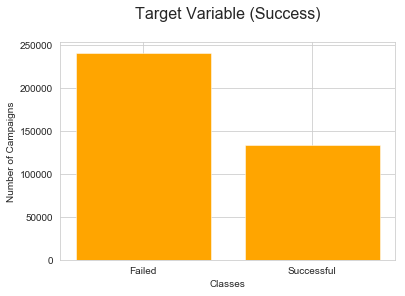

In [89]:
#creating a bar graph to display amount of failed vs. successful campaigns
plt.bar(['Failed', 'Successful'], df_final.successful.value_counts().values, facecolor = 'orange',  linewidth=0.5)
plt.title('Target Variable (Success)\n', fontsize=16)
plt.xlabel('Classes')
plt.ylabel('Number of Campaigns')
plt.show()

We already knew from previous EDA and our pie-chart of final states of the kickstarters that the amount of failed kickstarters dominated the amount of successful ones, but the graph above highlights that there is a a pretty high level of imbalance. We can remedy this using SMOTE.

<a id='smote'></a>

### SMOTE (Synthetic Minority Over-sampling Technique)

I am using a popular over-sampling method called SMOTE to resolve our imbalance of classes. SMOTE creates new minority instances between existing minority instances in our data instead of just making copies of minority classes. 

In [90]:
X = df_final.drop(['successful'], 1) #dropping target from X
y = df_final.successful #setting Y

In [91]:
X_scaled = scaler.fit_transform(X) #scale data

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0) #test/train split

In [93]:
from imblearn.over_sampling import SMOTE #import smote

In [94]:
smote = SMOTE(random_state=0) #random state is 0 for consistency

In [95]:
%%time

X_res, y_res = smote.fit_resample(X_train, y_train) #fitting smote to our train sets

Wall time: 45min 45s


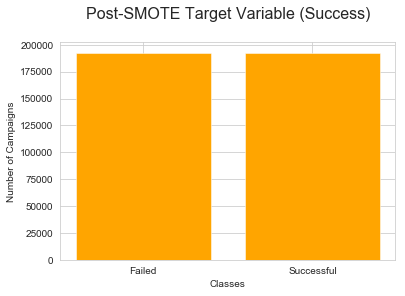

In [96]:
#updated bar graph to display amount of failed vs. successful campaigns post-SMOTE
plt.bar(['Failed', 'Successful'], [sum(y_res), len(y_res)-sum(y_res)], facecolor = 'orange',  linewidth=0.5)
plt.title('Post-SMOTE Target Variable (Success)\n', fontsize=16)
plt.xlabel('Classes')
plt.ylabel('Number of Campaigns')
plt.show()

It looks like our classes are balanced now! Let's proceed.

In [97]:
%%time

#just a few classifiers for sake of time
l_r = LogisticRegression(penalty='l2', solver='liblinear')
randomforest = RandomForestClassifier(n_estimators=100)
cat_model = CatBoostClassifier(
    custom_loss=['Accuracy'], #metric to use in training
    random_seed=0, #consistent with other random seeds
    logging_level='Silent' #we already have the time function to show time elapsed
)
decisiontree = DecisionTreeClassifier()

classifiers = [l_r, randomforest, cat_model, decisiontree] #list of classifiers
classifiers_names = ['Logistic Regression', 'Random Forest','Cat Model', 'Decision Tree'] #as well as their respective names

Wall time: 9.97 ms


In [98]:
%%time 

#iterating through a list of classifiers and appending their accuracy levels to a list of scores
scores = []
for i in range(len(classifiers)):
    classifiers[i].fit(X_res, y_res)
    scores.append(round(classifiers[i].score(X_test, y_test), 3))

Wall time: 7min 51s


In [99]:
#creating a separate dataframe to compare results
dfsmote = pd.DataFrame({'Model': classifiers_names, 'Score': scores})

dfsmote.sort_values(by='Score', ascending=False) #sorting the models by their score, highest to lowest

Model  Score
2            Cat Model  0.716
1        Random Forest  0.701
0  Logistic Regression  0.657
3        Decision Tree  0.615

Of the models that we chose to include, they all either stayed about the same in performance or did worse. For the additional time that it took to execute smote, I do not think that it is worth it. 

<a id='feature_import'></a>

## Feature Importance of Top Classifiers

Now that we know which classifiers have the most accuracy with our data, let's compare which features were the most important in the top three models: Catboost, Adaboost, and Random Forest

<a id='cat_feat'></a>

### Catboost Features

In [100]:
# Feature Importance
cat_feature = pd.DataFrame({'Importance': catmodel.feature_importances_, 'Column': X.columns}) #create new dataframe
cat_feature = cat_feature.sort_values(by='Importance', ascending=False) #display results highest to lowest
print('Catboost 25 Most Important Features')
cat_feature[:25] #top 25 features

Catboost 25 Most Important Features


Importance                        Column
0     18.391134                 usd_goal_real
1     13.043355               span_of_project
2      5.077302                   name_length
205    3.640168              launch_year_2017
218    3.460515               launch_month_12
4      2.729401            coleman_liau_index
17     2.397379                 category_Apps
178    2.099589           main_category_Music
8      2.088475                   gunning_fog
145    2.058010       category_Tabletop_Games
7      1.935931  dale_chall_readability_score
202    1.683380              launch_year_2014
3      1.643932          flesch_kincaid_grade
203    1.470404              launch_year_2015
77     1.375626              category_Hip_Hop
182    1.337187         main_category_Theater
160    1.287280                  category_Web
201    1.161793              launch_year_2013
173    0.953112         main_category_Fashion
138    0.926193               category_Shorts
169    0.871508          main_category_Comics
196    0.823384                  currency_USD
200    0.818969              launch_year_2012
6      0.739906               difficult_words
181    0.738386      main_category_Technology

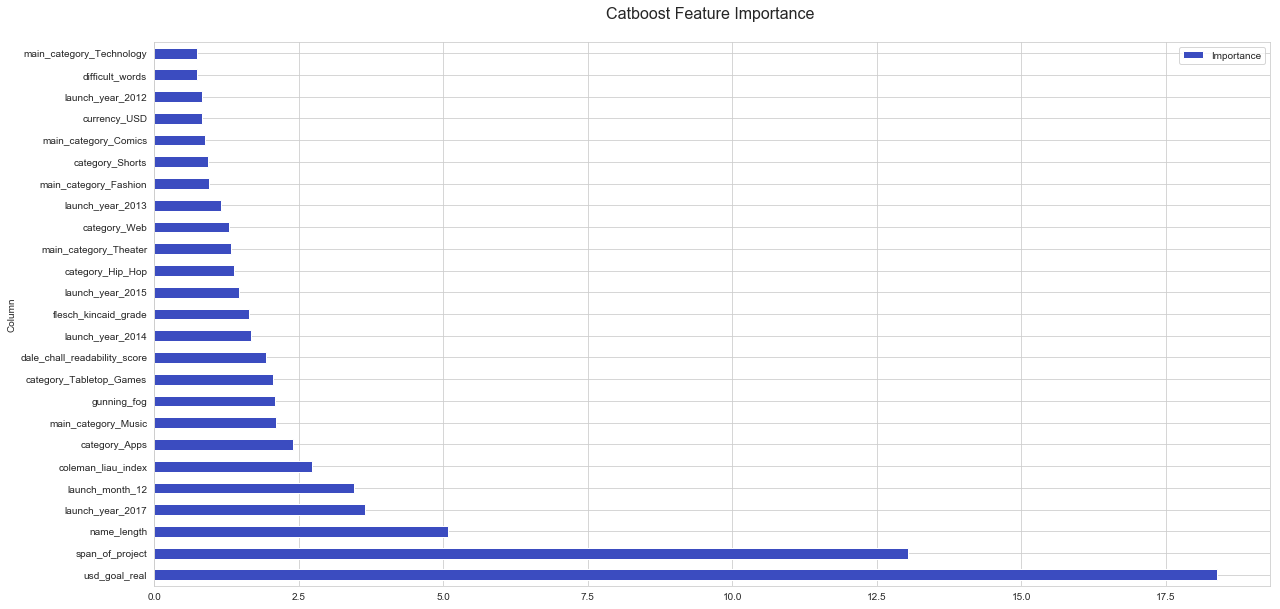

In [101]:
cat_feature = cat_feature[:25] #top 25 features
cat_feature.plot(kind='barh', x='Column', y='Importance', figsize=(20, 10), cmap = 'coolwarm')
plt.title('Catboost Feature Importance \n', fontsize=16)
plt.show()

usd_goal_real tops the list followed by span_of_project. I am seeing a good amount of TextStat variables as well as a pretty even number of categories and sub categories. A good percentage of our month and year variables also made the top feature list for Catboost.

<a id='ada_feat'></a>

### Adaboost Features

In [102]:
# Feature Importance
ada_feature = pd.DataFrame({'Importance': bdt.feature_importances_, 'Column': X.columns}) #create new dataframe
ada_feature = ada_feature.sort_values(by='Importance', ascending=False) #display results highest to lowest
print('Adaboost 25 Most Important Features')
ada_feature[:25] #top 25 features

Adaboost 25 Most Important Features


Importance                        Column
0      0.270213                 usd_goal_real
1      0.122009               span_of_project
2      0.073577                   name_length
4      0.037302            coleman_liau_index
7      0.027484  dale_chall_readability_score
17     0.025951                 category_Apps
3      0.022529          flesch_kincaid_grade
206    0.020917              launch_year_2018
8      0.015083                   gunning_fog
145    0.012592       category_Tabletop_Games
160    0.012464                  category_Web
178    0.010025           main_category_Music
218    0.008901               launch_month_12
200    0.008621              launch_year_2012
203    0.008244              launch_year_2015
6      0.007899               difficult_words
175    0.007322            main_category_Food
169    0.007264          main_category_Comics
201    0.007176              launch_year_2013
182    0.007048         main_category_Theater
174    0.006946  main_category_Film_and_Video
202    0.006760              launch_year_2014
77     0.006737              category_Hip_Hop
171    0.006658           main_category_Dance
138    0.006628               category_Shorts

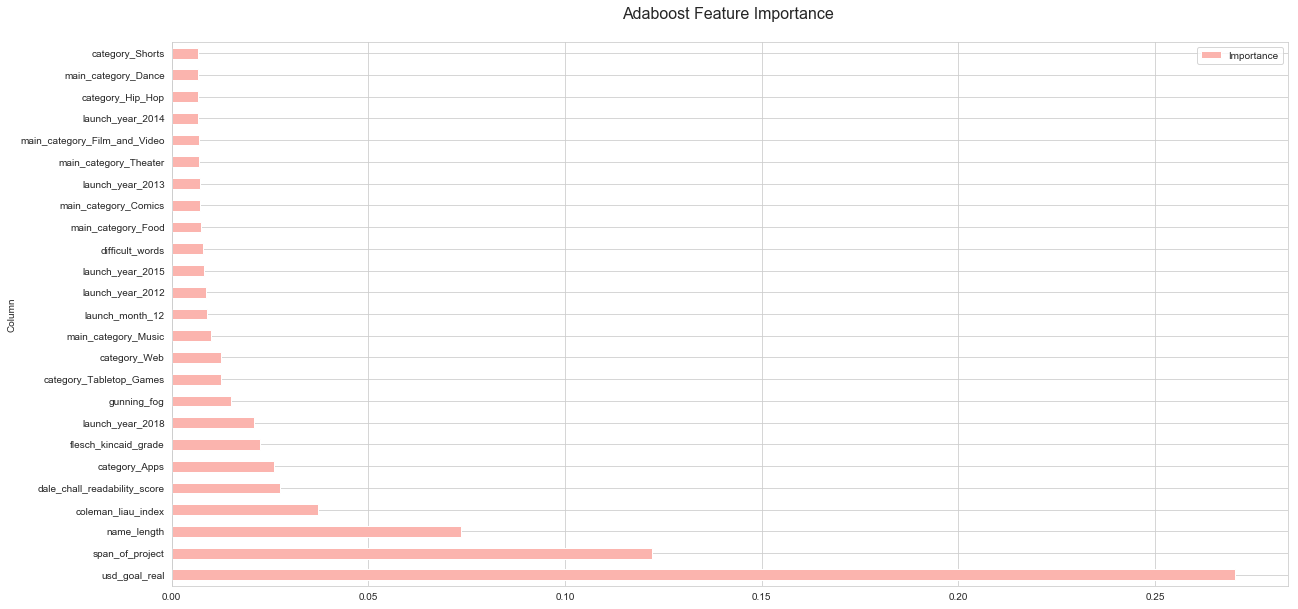

In [103]:
ada_feature = ada_feature[:25] #top 25 features
ada_feature.plot(kind='barh', x='Column', y='Importance', figsize=(20, 10), cmap= 'Pastel1')
plt.title('Adaboost Feature Importance \n', fontsize=16)
plt.show()

There are some definite similiarities between the Adaboost top 25 and the Catboost top 25. In both graphs, it is clear that usd_goal_real and span_of_project have much higher scores than the remaining features. I also see a lot of the year variables making a return in this graph as well as some overlap between categories, such as Web and Apps. 

<a id='rf_feat'></a>

### Random Forest Features

In [104]:
# Feature Importance
rf_feature = pd.DataFrame({'Importance': random_forest.feature_importances_, 'Column': X.columns}) #create new dataframe
rf_feature = rf_feature.sort_values(by='Importance', ascending=False) #display results highest to lowest
print('Random Forest 25 Most Important Features')
rf_feature[:25] #top 25 features

Random Forest 25 Most Important Features


Importance                        Column
0      0.138242                 usd_goal_real
1      0.080067               span_of_project
4      0.061174            coleman_liau_index
2      0.060031                   name_length
3      0.049557          flesch_kincaid_grade
7      0.046216  dale_chall_readability_score
8      0.044981                   gunning_fog
6      0.022393               difficult_words
178    0.015292           main_category_Music
145    0.013845       category_Tabletop_Games
203    0.010296              launch_year_2015
220    0.009810                  launch_day_1
182    0.009452         main_category_Theater
181    0.009054      main_category_Technology
221    0.008940                  launch_day_2
219    0.008744                  launch_day_0
222    0.008602                  launch_day_3
223    0.008414                  launch_day_4
138    0.008406               category_Shorts
202    0.008195              launch_year_2014
230    0.008168                name_title_0.0
231    0.007977                name_title_1.0
201    0.007686              launch_year_2013
213    0.007540                launch_month_7
169    0.007532          main_category_Comics

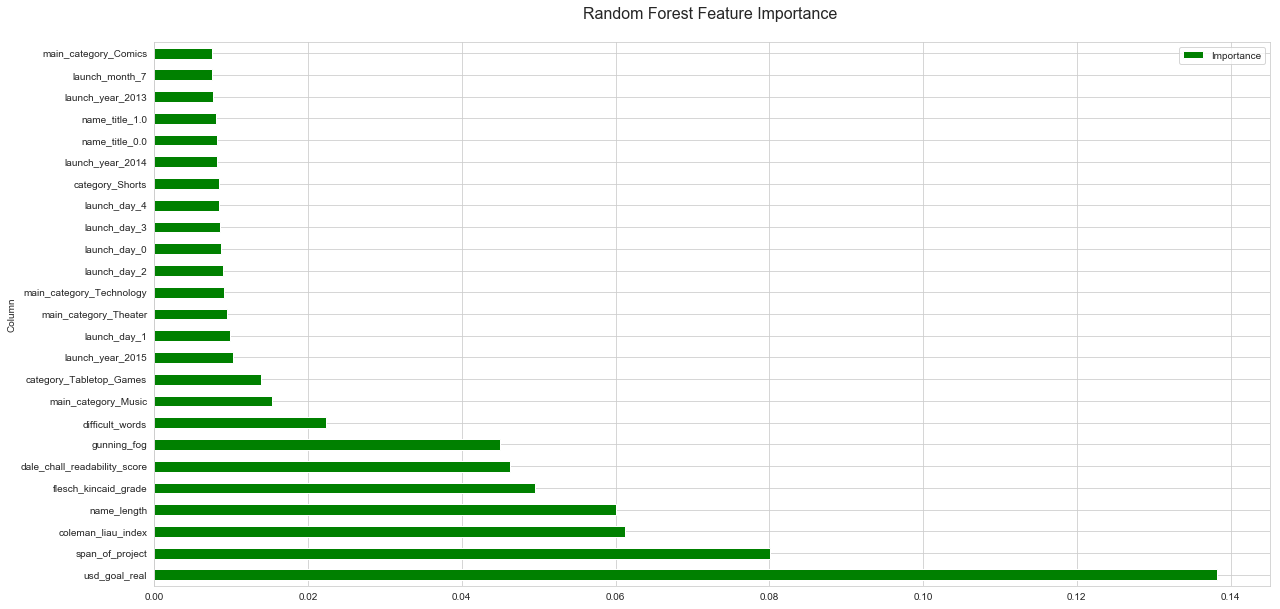

In [105]:
rf_feature = rf_feature[:25] #top 25 features
rf_feature.plot(kind='barh', x='Column', y='Importance', figsize=(20, 10), cmap= 'ocean')
plt.title('Random Forest Feature Importance \n', fontsize=16)
plt.show()

The Random Forest Top 25 has much smaller importance scores than Catboost and Adaboost, and it doesnt share as many of the same variables. However, usd_goal_real remains at number 1, just as it did in the previous graphs. One of the key differences between Random Forest and the other graphs is that the day of the week variables make more of an appearance.

<a id='overlap'></a>

### Overlap

Let's see what features are included in all three 'Top 25' lists.

In [106]:
cat = cat_feature.Column.unique() #creating lists from top 25 features in each classifier df
ada = ada_feature.Column.unique()
rf = rf_feature.Column.unique()

In [107]:
set(cat) & set(ada) & set(rf) #seeing which items appear in all three lists

{'category_Shorts',
 'category_Tabletop_Games',
 'coleman_liau_index',
 'dale_chall_readability_score',
 'difficult_words',
 'flesch_kincaid_grade',
 'gunning_fog',
 'launch_year_2013',
 'launch_year_2014',
 'launch_year_2015',
 'main_category_Comics',
 'main_category_Music',
 'main_category_Theater',
 'name_length',
 'span_of_project',
 'usd_goal_real'}

There are sixteen total items that appear in all three classifier top feature lists. It looks like four of our TextStat variables made the cut as well as one of the text describing variables that we created ourselves (name_length). Not only are usd_goal_real and span_of_project both included as well, but they were also each in the top 5 for all three individual classifier models.

<a id='conclusion'></a>

## Conclusion

One of the largest limitations of this data is that it does not provide information on the users who started each of these campaigns. I think the number of connections that a user has on Facebook or Instagram as well as the look of their page/profile has a heavy influence on how well their kickstarter campaign will do. The age, gender, and even occupation of the user who started the campaign could also be important for classification.

In the future, I think it would be interesting to try to get more creative with feature engineering, as there are many different directions that one can take with the amount of information in the dataset. I would also like to implement principal component analysis and additional hyperparameter tuning.